In [1]:
#한글폰트
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 경로 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 여기서 'malgun.ttf'는 예시로 사용한 것이며, 실제 한글 폰트 파일로 변경해야 합니다.
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 추가적으로, 축의 음수 부호가 제대로 표시되도록 설정
plt.rcParams['axes.unicode_minus'] = False


In [2]:
import pandas as pd

# 파일 경로
customer_info_path = 'C:/Users/82106/Desktop/데이터분석 프로젝트/이커머스 고객 세분화 분석 아이디어 경진대회/data/open/Customer_info.csv'
discount_info_path = 'C:/Users/82106/Desktop/데이터분석 프로젝트/이커머스 고객 세분화 분석 아이디어 경진대회/data/open/Discount_info.csv'
marketing_info_path = 'C:/Users/82106/Desktop/데이터분석 프로젝트/이커머스 고객 세분화 분석 아이디어 경진대회/data/open/Marketing_info.csv'
onlinesales_info_path = 'C:/Users/82106/Desktop/데이터분석 프로젝트/이커머스 고객 세분화 분석 아이디어 경진대회/data/open/Onlinesales_info.csv'
tax_info_path = 'C:/Users/82106/Desktop/데이터분석 프로젝트/이커머스 고객 세분화 분석 아이디어 경진대회/data/open/Tax_info.csv'

# 파일 불러오기
customer_info_df = pd.read_csv(customer_info_path)
discount_info_df = pd.read_csv(discount_info_path)
marketing_info_df = pd.read_csv(marketing_info_path)
onlinesales_info_df = pd.read_csv(onlinesales_info_path)
tax_info_df = pd.read_csv(tax_info_path)

# 데이터 프레임의 첫 5행 출력
(customer_info_df.head(), discount_info_df.head(), marketing_info_df.head(), onlinesales_info_df.head(), tax_info_df.head())


(        고객ID 성별        고객지역  가입기간
 0  USER_1358  남     Chicago    12
 1  USER_0190  남  California    43
 2  USER_0066  남     Chicago    33
 3  USER_0345  여  California    30
 4  USER_0683  남  California    49,
      월    제품카테고리    쿠폰코드  할인율
 0  Jan   Apparel  SALE10   10
 1  Feb   Apparel  SALE20   20
 2  Mar   Apparel  SALE30   30
 3  Jan  Nest-USA  ELEC10   10
 4  Feb  Nest-USA  ELEC20   20,
            날짜  오프라인비용    온라인비용
 0  2019-01-01    4500  2424.50
 1  2019-01-02    4500  3480.36
 2  2019-01-03    4500  1576.38
 3  2019-01-04    4500  2928.55
 4  2019-01-05    4500  4055.30,
         고객ID              거래ID        거래날짜          제품ID    제품카테고리  수량  \
 0  USER_1358  Transaction_0000  2019-01-01  Product_0981  Nest-USA   1   
 1  USER_1358  Transaction_0001  2019-01-01  Product_0981  Nest-USA   1   
 2  USER_1358  Transaction_0002  2019-01-01  Product_0904    Office   1   
 3  USER_1358  Transaction_0003  2019-01-01  Product_0203   Apparel   5   
 4  USER_1358  Transaction_0003  2

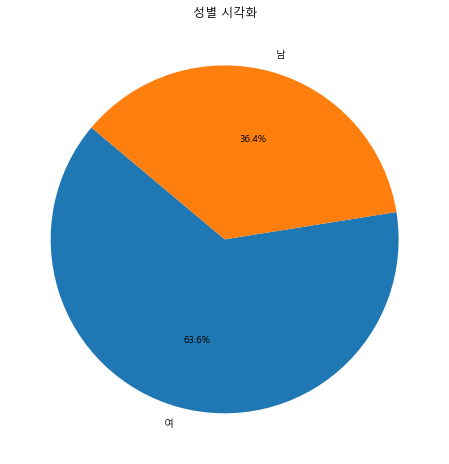

In [21]:
gender_counts = customer_info_df['성별'].value_counts()

# 원그래프 그리기
plt.figure(figsize=(8, 8))  # 그래프 크기 설정
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)  # 원그래프 그리기
plt.title('성별 시각화')  # 그래프 제목 설정
plt.show()  # 그래프 보여주기

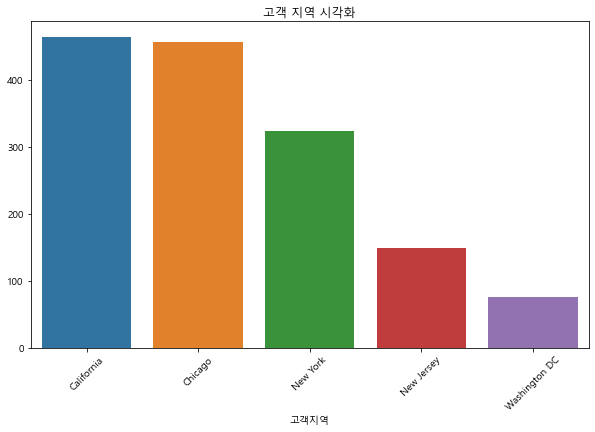

In [22]:
# customers_data에서 '고객지역' 열을 사용하여 지역별 거래량 계산
location_counts = customer_info_df['고객지역'].value_counts()

# 바 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
sns.barplot(x=location_counts.index, y=location_counts.values)  # seaborn을 사용한 바 그래프 그리기
plt.title('고객 지역 시각화')  # 그래프 제목 설정
plt.xlabel('고객지역')  # x축 레이블 설정
plt.xticks(rotation=45)  # x축 레이블 회전
plt.show()  # 그래프 보여주기

# RFM 분석

In [3]:
from datetime import datetime

# 현재 날짜 설정 (예시로 사용, 실제 분석 시 현재 날짜를 사용해야 함)
current_date = pd.to_datetime('2024-02-08')

# 온라인 판매 정보에서 '거래날짜'를 datetime 형태로 변환
onlinesales_info_df['거래날짜'] = pd.to_datetime(onlinesales_info_df['거래날짜'])

# Recency 계산을 위해 각 고객별 최근 구매일을 계산
recency_df = onlinesales_info_df.groupby('고객ID')['거래날짜'].max().reset_index()
recency_df['Recency'] = (current_date - recency_df['거래날짜']).dt.days

# Frequency 계산을 위해 각 고객별 구매 빈도를 계산
frequency_df = onlinesales_info_df.groupby('고객ID')['거래ID'].nunique().reset_index()
frequency_df.rename(columns={'거래ID': 'Frequency'}, inplace=True)

# Monetary 계산을 위해 각 고객별 총 구매 금액을 계산
onlinesales_info_df['총금액'] = onlinesales_info_df['평균금액'] * onlinesales_info_df['수량']
monetary_df = onlinesales_info_df.groupby('고객ID')['총금액'].sum().reset_index()
monetary_df.rename(columns={'총금액': 'Monetary'}, inplace=True)
moneytary_df.rename(columns={'총금액':'Monetary'},inplace=True)

# RFM 데이터프레임 생성
rfm_df = recency_df.merge(frequency_df, on='고객ID').merge(monetary_df, on='고객ID')
rfm_df=recency_df.merge

# 고객 정보 데이터프레임과 RFM 데이터프레임 통합
customer_rfm_df = customer_info_df.merge(rfm_df, on='고객ID')

customer_rfm_df.head()


,고객ID,성별,고객지역,가입기간,거래날짜,Recency,Frequency,Monetary
0,USER_1358,남,Chicago,12,2019-01-26,1839,177,34551.40
1,USER_0190,남,California,43,2019-12-18,1513,26,3048.79
2,USER_0066,남,Chicago,33,2019-08-02,1651,15,2361.48
3,USER_0345,여,California,30,2019-01-01,1864,1,1.24
4,USER_0683,남,California,49,2019-08-30,1623,6,1043.72


In [109]:
!pip install --upgrade threadpoolctl


In [110]:
!pip install --upgrade threadpoolctl scikit-learn numpy scipy


In [5]:
pip install --upgrade threadpoolctl


Note: you may need to restart the kernel to use updated packages.


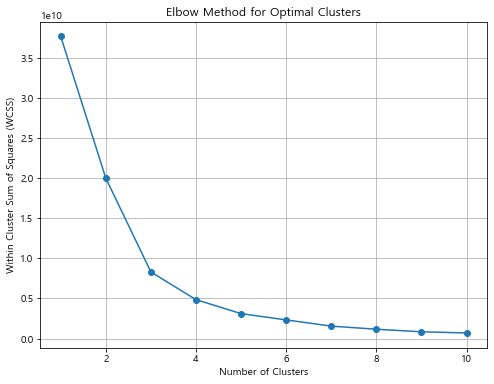

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# RFM 데이터프레임을 사용하여 클러스터링을 수행할 데이터를 준비합니다.
X = customer_rfm_df[['Recency', 'Frequency', 'Monetary']]

# 클러스터 수 범위 설정
cluster_range = range(1, 11)
cluster_errors = []

# 각 클러스터 수에 대해 K-means 모델을 학습하고 오차를 계산합니다.
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_errors.append(kmeans.inertia_)

# 엘보우 포인트(최적의 클러스터 수)를 찾습니다.
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, cluster_errors, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()


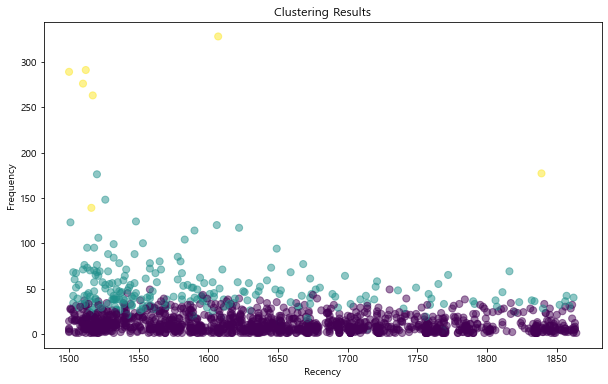

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# RFM 데이터프레임을 사용하여 클러스터링을 수행할 데이터를 준비합니다.
X = customer_rfm_df[['Recency', 'Frequency', 'Monetary']]

# 클러스터 수를 3으로 설정하여 K-means 모델을 학습합니다.
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# 클러스터링 결과를 원본 데이터프레임에 추가합니다.
customer_rfm_df['Cluster'] = kmeans.labels_

# 클러스터링 결과를 시각화하여 확인합니다.
plt.figure(figsize=(10, 6))

plt.scatter(customer_rfm_df['Recency'], customer_rfm_df['Frequency'], c=customer_rfm_df['Cluster'], cmap='viridis', s=50, alpha=0.5)
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Clustering Results')

plt.show()


In [6]:
# 각 클러스터의 평균 RFM 값을 계산합니다.
cluster_means = customer_rfm_df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    '고객ID': 'count'  # 각 클러스터의 고객 수를 계산합니다.
}).reset_index()

# 각 클러스터의 특성을 출력합니다.
print(cluster_means)


   Cluster      Recency   Frequency      Monetary  고객ID
0        0  1652.522231   11.164915   1736.932660  1237
1        1  1601.116071   49.361607   9594.733080   224
2        2  1571.571429  251.857143  53284.101429     7


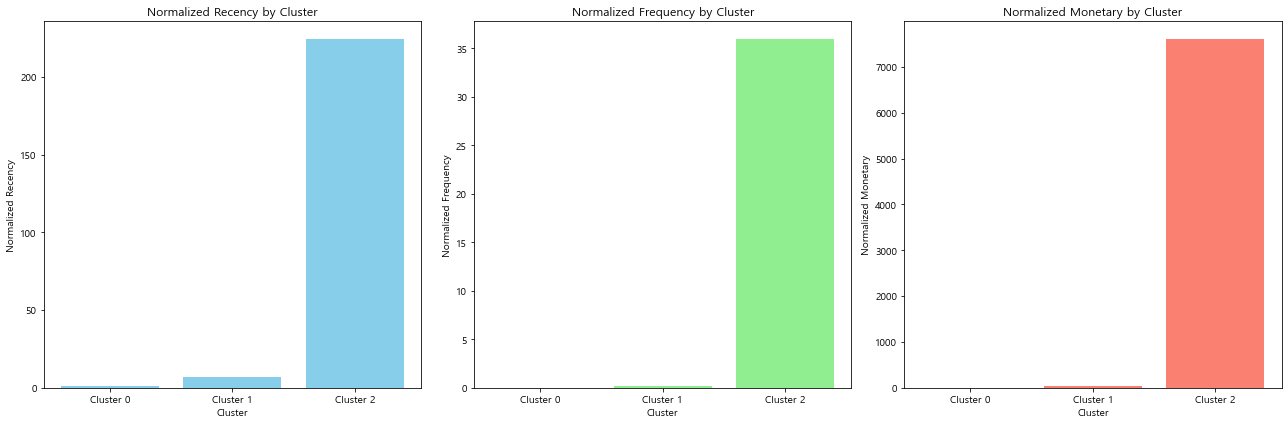

In [7]:
import matplotlib.pyplot as plt

# 클러스터 정보
clusters = ['Cluster 0', 'Cluster 1', 'Cluster 2']

# 클러스터별 1인당 평균 Recency, Frequency, Monetary 값
recency = [1652.522231, 1601.116071, 1571.571429]
frequency = [11.164915, 49.361607, 251.857143]
monetary = [1736.932660, 9594.733080, 53284.101429]

# 클러스터별 고객 수 (수정된 값)
customer_counts = [1237, 224, 7]

# 1인당 평균 값 계산
normalized_recency = [value / count for value, count in zip(recency, customer_counts)]
normalized_frequency = [value / count for value, count in zip(frequency, customer_counts)]
normalized_monetary = [value / count for value, count in zip(monetary, customer_counts)]

# 시각화
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Recency
axs[0].bar(clusters, normalized_recency, color='skyblue')
axs[0].set_title('Normalized Recency by Cluster')
axs[0].set_xlabel('Cluster')
axs[0].set_ylabel('Normalized Recency')

# Frequency
axs[1].bar(clusters, normalized_frequency, color='lightgreen')
axs[1].set_title('Normalized Frequency by Cluster')
axs[1].set_xlabel('Cluster')
axs[1].set_ylabel('Normalized Frequency')

# Monetary
axs[2].bar(clusters, normalized_monetary, color='salmon')
axs[2].set_title('Normalized Monetary by Cluster')
axs[2].set_xlabel('Cluster')
axs[2].set_ylabel('Normalized Monetary')

plt.tight_layout()
plt.show()


Cluster      Recency   Frequency      Monetary  고객ID

0        0  1652.522231   11.164915   1736.932660  1237

1        1  1601.116071   49.361607   9594.733080   224

2        2  1571.571429  251.857143  53284.101429     7

클러스터 2가 모든 부분에서 압도적이므로 , 마케팅을 2에게 맞추는것이 효율이 좋다.

# 클러스터 1원당 거래빈도수

In [4]:
# 클러스터별 Frequency와 Monetary 값
clusters = {
    0: {'Frequency': 11.164915, 'Monetary': 1736.932660},
    1: {'Frequency': 49.361607, 'Monetary': 9594.733080},
    2: {'Frequency': 251.857143, 'Monetary': 53284.101429}
}



In [5]:
# 각 클러스터의 Frequency 대비 Monetary 비율을 1원당 Frequency로 계산
frequency_per_monetary = {cluster: info['Frequency'] / info['Monetary'] for cluster, info in clusters.items()}
frequency_per_monetary


{0: 0.006427949256248081, 1: 0.005144656614043087, 2: 0.004726684625349169}

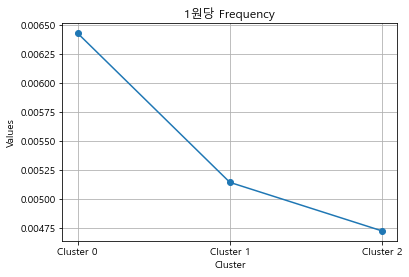

In [12]:
import matplotlib.pyplot as plt

data = {0: 0.006427949256248081, 1: 0.005144656614043087, 2: 0.004726684625349169}

keys = list(data.keys())
values = list(data.values())

plt.plot(keys, values, marker='o', linestyle='-')
plt.xlabel('Cluster')
plt.ylabel('Values')
plt.title('1원당 Frequency')

plt.xticks(keys, ['Cluster 0', 'Cluster 1', 'Cluster 2'])

plt.grid(True)  # 그리드 추가

plt.show()


클러스터 1이 가장 빈도가 높고 클러스터 2가 가장 빈도가 적다

# 클러스터별 거래기간

In [22]:
# 필요한 라이브러리 재로딩
import pandas as pd
from sklearn.cluster import KMeans
from datetime import datetime

# 파일 경로
customer_info_path = 'C:/Users/82106/Desktop/데이터분석 프로젝트/이커머스 고객 세분화 분석 아이디어 경진대회/data/open/Customer_info.csv'
onlinesales_info_path = 'C:/Users/82106/Desktop/데이터분석 프로젝트/이커머스 고객 세분화 분석 아이디어 경진대회/data/open/Onlinesales_info.csv'

# 파일 불러오기
customer_info_df = pd.read_csv(customer_info_path)
onlinesales_info_df = pd.read_csv(onlinesales_info_path)

# 현재 날짜 설정
current_date = pd.to_datetime('2024-02-08')

# 거래날짜를 datetime 형태로 변환
onlinesales_info_df['거래날짜'] = pd.to_datetime(onlinesales_info_df['거래날짜'])

# RFM 지표 계산
recency_df = onlinesales_info_df.groupby('고객ID')['거래날짜'].max().reset_index()
recency_df['Recency'] = (current_date - recency_df['거래날짜']).dt.days
frequency_df = onlinesales_info_df.groupby('고객ID')['거래ID'].nunique().reset_index().rename(columns={'거래ID': 'Frequency'})
onlinesales_info_df['총금액'] = onlinesales_info_df['평균금액'] * onlinesales_info_df['수량']
monetary_df = onlinesales_info_df.groupby('고객ID')['총금액'].sum().reset_index().rename(columns={'총금액': 'Monetary'})
rfm_df = recency_df.merge(frequency_df, on='고객ID').merge(monetary_df, on='고객ID')

# 고객 정보 데이터프레임과 RFM 데이터프레임 통합
customer_rfm_df = customer_info_df.merge(rfm_df, on='고객ID')

# K-means 클러스터링 수행
X = customer_rfm_df[['Recency', 'Frequency', 'Monetary']]
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
customer_rfm_df['Cluster'] = kmeans.labels_


In [27]:
customer_rfm_df['Cluster']

0       2
1       0
2       0
3       0
4       0
       ..
1463    0
1464    0
1465    0
1466    0
1467    0
Name: Cluster, Length: 1468, dtype: int32

In [23]:
# 클러스터별 거래 기간 계산 함수
def calculate_transaction_period(cluster_id):
    # 해당 클러스터에 속한 고객들의 고객ID 가져오기
    cluster_customers = customer_rfm_df[customer_rfm_df['Cluster'] == cluster_id]['고객ID'].tolist()
    
    # 해당 클러스터에 속한 고객들의 거래 데이터 가져오기
    cluster_transactions = onlinesales_info_df[onlinesales_info_df['고객ID'].isin(cluster_customers)]
    
    if len(cluster_transactions) == 0:
        return None  # 해당 클러스터에 대한 거래 데이터가 없는 경우
    
    # 각 고객별 최초 거래일과 최종 거래일 계산
    min_transaction_date = cluster_transactions.groupby('고객ID')['거래날짜'].min()
    max_transaction_date = cluster_transactions.groupby('고객ID')['거래날짜'].max()
    
    # 최초 거래일과 최종 거래일로부터 거래 기간 계산
    transaction_periods = (max_transaction_date - min_transaction_date).dt.days
    
    # 평균 거래 기간 계산
    avg_transaction_period = transaction_periods.mean()
    
    return avg_transaction_period

# 각 클러스터별 거래 기간 계산 및 출력
for cluster_id in range(3):  # 클러스터 개수에 따라 범위를 조정할 수 있습니다.
    avg_period = calculate_transaction_period(cluster_id)
    if avg_period is not None:
        print(f"클러스터 {cluster_id}의 평균 거래 기간: {avg_period} 일")
    else:
        print(f"클러스터 {cluster_id}에 대한 거래 데이터가 없습니다.")


클러스터 0의 평균 거래 기간: 49.324979789814066 일
클러스터 1의 평균 거래 기간: 141.99553571428572 일
클러스터 2의 평균 거래 기간: 236.71428571428572 일


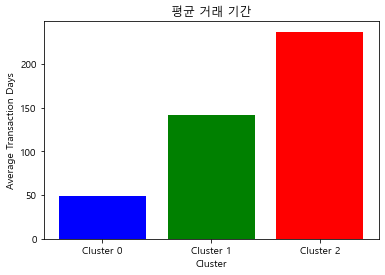

In [14]:
import matplotlib.pyplot as plt

cluster_names = ['Cluster 0', 'Cluster 1', 'Cluster 2']
avg_transaction_days = [49.324979789814066, 141.99553571428572, 236.71428571428572]

plt.bar(cluster_names, avg_transaction_days, color=['blue', 'green', 'red'])
plt.xlabel('Cluster')
plt.ylabel('Average Transaction Days')
plt.title('평균 거래 기간')
plt.show()


# 클러스터별 선호 제품 카테고리

In [26]:
# 클러스터 정보를 포함한 고객 데이터 프레임과 거래 데이터 프레임을 결합
merged_df = pd.merge(onlinesales_info_df, customer_rfm_df, on='고객ID')

# 클러스터별로 가장 많이 구매된 제품 카테고리를 분석
cluster_product_counts = merged_df.groupby(['Cluster', '제품카테고리']).size().unstack(fill_value=0)

# 클러스터별 구매된 제품 카테고리의 분포를 출력
print(cluster_product_counts)

제품카테고리   Accessories  Android  Apparel  Backpacks  Bags  Bottles  Drinkware  \
Cluster                                                                       
0                120       26     9665         41   965      137       1808   
1                 88       14     7291         40   776      114       1415   
2                 26        3     1170          8   141       17        260   

제품카테고리   Fun  Gift Cards  Google  Headgear  Housewares  Lifestyle  More Bags  \
Cluster                                                                        
0         84          63      53       380          74       1609         28   
1         58          80      43       336          39       1292         16   
2         18          16       9        55           9        191          2   

제품카테고리   Nest  Nest-Canada  Nest-USA  Notebooks & Journals  Office  Waze  
Cluster                                                                   
0        1002          159      6932                 

In [27]:
# 필요한 라이브러리 재로딩
import pandas as pd

# 클러스터별 제품 카테고리 구매 데이터 생성
data = {
    "Accessories": [120, 88, 26],
    "Android": [26, 14, 3],
    "Apparel": [9665, 7291, 1170],
    "Backpacks": [41, 40, 8],
    "Bags": [965, 776, 141],
    "Bottles": [137, 114, 17],
    "Drinkware": [1808, 1415, 260],
    "Fun": [84, 58, 18],
    "Gift Cards": [63, 80, 16],
    "Google": [53, 43, 9],
    "Headgear": [380, 336, 55],
    "Housewares": [74, 39, 9],
    "Lifestyle": [1609, 1292, 191],
    "More Bags": [28, 16, 2],
    "Nest": [1002, 1061, 135],
    "Nest-Canada": [159, 134, 24],
    "Nest-USA": [6932, 6143, 938],
    "Notebooks & Journals": [373, 328, 48],
    "Office": [3489, 2632, 392],
    "Waze": [248, 259, 47]
}
cluster_df = pd.DataFrame(data, index=[0, 1, 2])

# 클러스터별 고객 수
customer_counts = pd.Series([1237, 224, 7], index=[0, 1, 2])

# 카테고리별 구매수를 고객수로 나누어 평균 구매수를 계산
average_purchases_per_customer = cluster_df.div(customer_counts, axis=0)

average_purchases_per_customer


,Accessories,Android,Apparel,Backpacks,Bags,Bottles,Drinkware,Fun,Gift Cards,Google,Headgear,Housewares,Lifestyle,More Bags,Nest,Nest-Canada,Nest-USA,Notebooks & Journals,Office,Waze
0,0.097009,0.021019,7.813258,0.033145,0.780113,0.110752,1.461601,0.067906,0.050930,0.042846,0.307195,0.059822,1.300728,0.022635,0.810024,0.128537,5.603880,0.301536,2.820534,0.200485
1,0.392857,0.062500,32.549107,0.178571,3.464286,0.508929,6.316964,0.258929,0.357143,0.191964,1.500000,0.174107,5.767857,0.071429,4.736607,0.598214,27.424107,1.464286,11.750000,1.156250
2,3.714286,0.428571,167.142857,1.142857,20.142857,2.428571,37.142857,2.571429,2.285714,1.285714,7.857143,1.285714,27.285714,0.285714,19.285714,3.428571,134.000000,6.857143,56.000000,6.714286


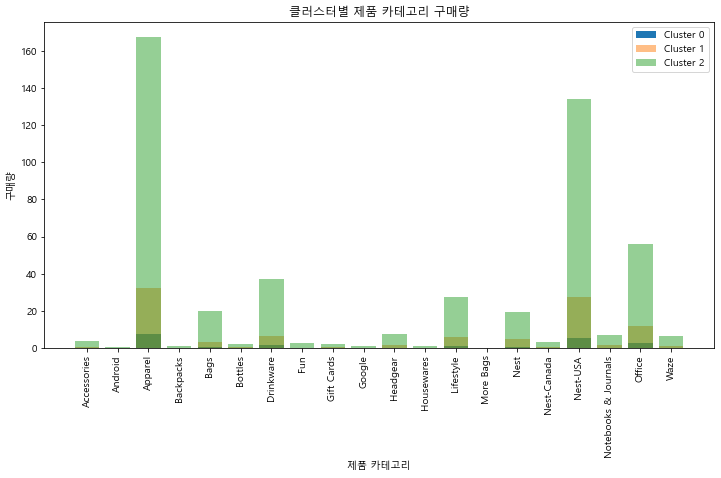

In [139]:
import matplotlib.pyplot as plt

# 각 제품 카테고리와 클러스터 별 구매량 데이터
categories = ['Accessories', 'Android', 'Apparel', 'Backpacks', 'Bags', 'Bottles', 'Drinkware', 
              'Fun', 'Gift Cards', 'Google', 'Headgear', 'Housewares', 'Lifestyle', 'More Bags', 
              'Nest', 'Nest-Canada', 'Nest-USA', 'Notebooks & Journals', 'Office', 'Waze']

cluster_0_values = [0.097009, 0.021019, 7.813258, 0.033145, 0.780113, 0.110752, 1.461601, 0.067906, 
                    0.050930, 0.042846, 0.307195, 0.059822, 1.300728, 0.022635, 0.810024, 0.128537, 
                    5.603880, 0.301536, 2.820534, 0.200485]
cluster_1_values = [0.392857, 0.062500, 32.549107, 0.178571, 3.464286, 0.508929, 6.316964, 0.258929, 
                    0.357143, 0.191964, 1.500000, 0.174107, 5.767857, 0.071429, 4.736607, 0.598214, 
                    27.424107, 1.464286, 11.750000, 1.156250]
cluster_2_values = [3.714286, 0.428571, 167.142857, 1.142857, 20.142857, 2.428571, 37.142857, 2.571429, 
                    2.285714, 1.285714, 7.857143, 1.285714, 27.285714, 0.285714, 19.285714, 3.428571, 
                    134.000000, 6.857143, 56.000000, 6.714286]

# 그래프를 그립니다.
plt.figure(figsize=(12, 6))

plt.bar(categories, cluster_0_values, label='Cluster 0')
plt.bar(categories, cluster_1_values, label='Cluster 1', alpha=0.5)
plt.bar(categories, cluster_2_values, label='Cluster 2', alpha=0.5)

plt.xlabel('제품 카테고리')
plt.ylabel('구매량')
plt.title('클러스터별 제품 카테고리 구매량')
plt.xticks(rotation=90)
plt.legend()

plt.show()


In [177]:
# 데이터
data = {
    "Accessories": [120, 88, 26],
    "Android": [26, 14, 3],
    "Apparel": [9665, 7291, 1170],
    "Backpacks": [41, 40, 8],
    "Bags": [965, 776, 141],
    "Bottles": [137, 114, 17],
    "Drinkware": [1808, 1415, 260],
    "Fun": [84, 58, 18],
    "Gift Cards": [63, 80, 16],
    "Google": [53, 43, 9],
    "Headgear": [380, 336, 55],
    "Housewares": [74, 39, 9],
    "Lifestyle": [1609, 1292, 191],
    "More Bags": [28, 16, 2],
    "Nest": [1002, 1061, 135],
    "Nest-Canada": [159, 134, 24],
    "Nest-USA": [6932, 6143, 938],
    "Notebooks & Journals": [373, 328, 48],
    "Office": [3489, 2632, 392],
    "Waze": [248, 259, 47]
}

# 각 하위 카테고리별 총합 계산
category_sum = {category: sum(data[category]) for category in data}

# 상위 10개 카테고리 선택
top_10_categories = sorted(category_sum, key=category_sum.get, reverse=True)[:10]

# 상위 10개 카테고리 출력
print("상위 10개 카테고리:")
for category in top_10_categories:
    print(category)


상위 10개 카테고리:
Apparel
Nest-USA
Office
Drinkware
Lifestyle
Nest
Bags
Headgear
Notebooks & Journals
Waze


In [178]:
# 데이터
data = {
    "Accessories": [120, 88, 26],
    "Android": [26, 14, 3],
    "Apparel": [9665, 7291, 1170],
    "Backpacks": [41, 40, 8],
    "Bags": [965, 776, 141],
    "Bottles": [137, 114, 17],
    "Drinkware": [1808, 1415, 260],
    "Fun": [84, 58, 18],
    "Gift Cards": [63, 80, 16],
    "Google": [53, 43, 9],
    "Headgear": [380, 336, 55],
    "Housewares": [74, 39, 9],
    "Lifestyle": [1609, 1292, 191],
    "More Bags": [28, 16, 2],
    "Nest": [1002, 1061, 135],
    "Nest-Canada": [159, 134, 24],
    "Nest-USA": [6932, 6143, 938],
    "Notebooks & Journals": [373, 328, 48],
    "Office": [3489, 2632, 392],
    "Waze": [248, 259, 47]
}

# 각 하위 카테고리별 총합 계산
category_sum = {category: sum(data[category]) for category in data}

# 하위 10개 카테고리 선택
bottom_10_categories = sorted(category_sum, key=category_sum.get)[:10]

# 하위 10개 카테고리 출력
print("하위 10개 카테고리:")
for category in bottom_10_categories:
    print(category)


하위 10개 카테고리:
Android
More Bags
Backpacks
Google
Housewares
Gift Cards
Fun
Accessories
Bottles
Nest-Canada


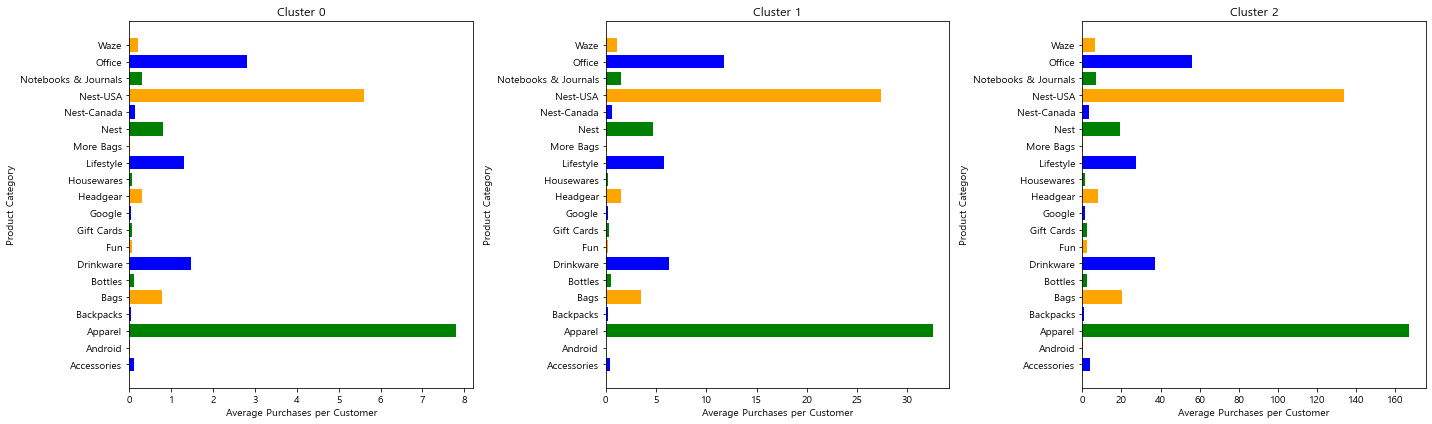

In [165]:
import pandas as pd
import matplotlib.pyplot as plt

# 클러스터별 제품 카테고리 구매 데이터 생성
data = {
    "Accessories": [120, 88, 26],
    "Android": [26, 14, 3],
    "Apparel": [9665, 7291, 1170],
    "Backpacks": [41, 40, 8],
    "Bags": [965, 776, 141],
    "Bottles": [137, 114, 17],
    "Drinkware": [1808, 1415, 260],
    "Fun": [84, 58, 18],
    "Gift Cards": [63, 80, 16],
    "Google": [53, 43, 9],
    "Headgear": [380, 336, 55],
    "Housewares": [74, 39, 9],
    "Lifestyle": [1609, 1292, 191],
    "More Bags": [28, 16, 2],
    "Nest": [1002, 1061, 135],
    "Nest-Canada": [159, 134, 24],
    "Nest-USA": [6932, 6143, 938],
    "Notebooks & Journals": [373, 328, 48],
    "Office": [3489, 2632, 392],
    "Waze": [248, 259, 47]
}
cluster_df = pd.DataFrame(data, index=[0, 1, 2])

# 클러스터별 고객 수
customer_counts = pd.Series([1237, 224, 7], index=[0, 1, 2])

# 카테고리별 구매수를 고객수로 나누어 평균 구매수를 계산
average_purchases_per_customer = cluster_df.div(customer_counts, axis=0)

# 시각화
plt.figure(figsize=(20, 6))

# 각 클러스터별로 제품 카테고리의 평균 구매 수를 막대 그래프로 나타냅니다.
for i, (index, row) in enumerate(average_purchases_per_customer.iterrows()):
    plt.subplot(1, 3, i+1)
    plt.barh(row.index, row.values, color=['blue', 'orange', 'green'])
    plt.title(f'Cluster {index}')
    plt.xlabel('Average Purchases per Customer')
    plt.ylabel('Product Category')

plt.tight_layout()
plt.show()


클러스터 0 (고객 수: 1237명)의 경우, 평균적으로 Apparel 제품 카테고리에서 가장 많은 구매가 이루어졌으며, 그 다음으로 Nest-USA, Office, Drinkware 순으로 구매가 많았다.

클러스터 1 (고객 수: 224명)은 평균적으로 Apparel, Nest-USA, Office, Bags 카테고리에서 높은 구매수를 보였습니다. 특히 Apparel 카테고리에서의 구매수가 눈에 띄게 높다.

클러스터 2 (고객 수: 7명)는 비교적 작은 고객 수에도 불구하고 Apparel, Nest-USA, Office, Bags 카테고리에서 매우 높은 평균 구매수를 보였으며, 특히 Nest-USA 카테고리에서 평균 134개의 상당히 높은 구매수를 기록했다.

In [168]:
data = {
    "Accessories": [120, 88, 26],
    "Android": [26, 14, 3],
    "Apparel": [9665, 7291, 1170],
    "Backpacks": [41, 40, 8],
    "Bags": [965, 776, 141],
    "Bottles": [137, 114, 17],
    "Drinkware": [1808, 1415, 260],
    "Fun": [84, 58, 18],
    "Gift Cards": [63, 80, 16],
    "Google": [53, 43, 9],
    "Headgear": [380, 336, 55],
    "Housewares": [74, 39, 9],
    "Lifestyle": [1609, 1292, 191],
    "More Bags": [28, 16, 2],
    "Nest": [1002, 1061, 135],
    "Nest-Canada": [159, 134, 24],
    "Nest-USA": [6932, 6143, 938],
    "Notebooks & Journals": [373, 328, 48],
    "Office": [3489, 2632, 392],
    "Waze": [248, 259, 47]
}

# 각 클러스터별 총 거래 수 계산
total_transactions_per_cluster = [sum(values) for values in zip(*data.values())]

# 각 카테고리별 클러스터 비율 계산
category_ratios_per_cluster = {category: [count / total for count, total in zip(counts, total_transactions_per_cluster)] for category, counts in data.items()}

# 클러스터 2가 클러스터 0, 1에 비해 상대적으로 선호하는 카테고리 찾기
# 클러스터 2의 비율에서 클러스터 0과 1의 평균 비율을 뺀 값 계산
preference_difference = {category: ratios[2] - ((ratios[0] + ratios[1]) / 2) for category, ratios in category_ratios_per_cluster.items()}

# 클러스터 2가 상대적으로 더 선호하는 카테고리 찾기 (클러스터 2 선호도가 높은 순으로 정렬)
preferred_categories_cluster2 = sorted(preference_difference.items(), key=lambda x: x[1], reverse=True)

preferred_categories_cluster2[:5]  # 상위 5개 선호 카테고리 출력


[('Drinkware', 0.008999838597887416),
 ('Bags', 0.004970048505035025),
 ('Accessories', 0.003222519047978831),
 ('Waze', 0.003000545841290366),
 ('Fun', 0.0022799981408309473)]

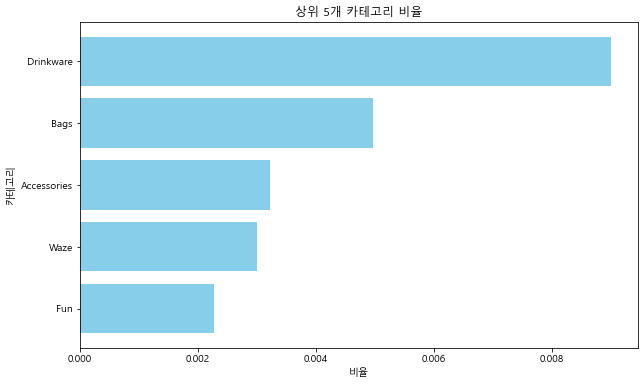

In [169]:
import matplotlib.pyplot as plt

# 주어진 데이터
data = [('Drinkware', 0.008999838597887416),
        ('Bags', 0.004970048505035025),
        ('Accessories', 0.003222519047978831),
        ('Waze', 0.003000545841290366),
        ('Fun', 0.0022799981408309473)]

# 데이터 추출
categories = [x[0] for x in data]
values = [x[1] for x in data]

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(categories, values, color='skyblue')
plt.xlabel('비율')
plt.ylabel('카테고리')
plt.title('상위 5개 카테고리 비율')
plt.gca().invert_yaxis()  # y축 순서 뒤집기
plt.show()


이 결과는 클러스터 2의 고객들이 특히 Drinkware, Bags, Accessories, Waze, 그리고 Fun 카테고리에 대해 더 큰 선호도를 보인다는 것을 나타낸다. 이러한 인사이트는 클러스터 2를 대상으로 하는 마케팅 전략이나 제품 추천 시 해당 카테고리에 더 많은 주목을 기울일 필요가 있음을 시사. 클러스터 2의 고객들에게 특히 이러한 카테고리의 제품을 중심으로 한 맞춤형 프로모션을 계획하는 것이 효과적일 수 있다.

# 클러스터별 거래수 (평일, 주말)

In [19]:
# 필요한 라이브러리 재로딩
import pandas as pd
from sklearn.cluster import KMeans
from datetime import datetime

# 파일 경로
customer_info_path = 'C:/Users/82106/Desktop/데이터분석 프로젝트/이커머스 고객 세분화 분석 아이디어 경진대회/data/open/Customer_info.csv'
onlinesales_info_path = 'C:/Users/82106/Desktop/데이터분석 프로젝트/이커머스 고객 세분화 분석 아이디어 경진대회/data/open/Onlinesales_info.csv'

# 파일 불러오기
customer_info_df = pd.read_csv(customer_info_path)
onlinesales_info_df = pd.read_csv(onlinesales_info_path)

# 현재 날짜 설정
current_date = pd.to_datetime('2024-02-08')

# 거래날짜를 datetime 형태로 변환
onlinesales_info_df['거래날짜'] = pd.to_datetime(onlinesales_info_df['거래날짜'])

# RFM 지표 계산
recency_df = onlinesales_info_df.groupby('고객ID')['거래날짜'].max().reset_index()
recency_df['Recency'] = (current_date - recency_df['거래날짜']).dt.days
frequency_df = onlinesales_info_df.groupby('고객ID')['거래ID'].nunique().reset_index().rename(columns={'거래ID': 'Frequency'})
onlinesales_info_df['총금액'] = onlinesales_info_df['평균금액'] * onlinesales_info_df['수량']
monetary_df = onlinesales_info_df.groupby('고객ID')['총금액'].sum().reset_index().rename(columns={'총금액': 'Monetary'})
rfm_df = recency_df.merge(frequency_df, on='고객ID').merge(monetary_df, on='고객ID')

# 고객 정보 데이터프레임과 RFM 데이터프레임 통합
customer_rfm_df = customer_info_df.merge(rfm_df, on='고객ID')

# K-means 클러스터링 수행
X = customer_rfm_df[['Recency', 'Frequency', 'Monetary']]
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
customer_rfm_df['Cluster'] = kmeans.labels_

# 클러스터링 결과 확인
customer_rfm_df.head()


,고객ID,성별,고객지역,가입기간,거래날짜,Recency,Frequency,Monetary,Cluster
0,USER_1358,남,Chicago,12,2019-01-26,1839,177,34551.40,2
1,USER_0190,남,California,43,2019-12-18,1513,26,3048.79,0
2,USER_0066,남,Chicago,33,2019-08-02,1651,15,2361.48,0
3,USER_0345,여,California,30,2019-01-01,1864,1,1.24,0
4,USER_0683,남,California,49,2019-08-30,1623,6,1043.72,0


In [66]:
# 거래날짜를 요일로 변환 (0=월요일, ..., 6=일요일)
onlinesales_info_df['요일'] = onlinesales_info_df['거래날짜'].dt.dayofweek

# 평일(0-4)과 주말(5, 6) 구분
onlinesales_info_df['거래유형'] = onlinesales_info_df['요일'].apply(lambda x: '주말' if x >= 5 else '평일')

# 거래 정보와 클러스터 정보를 결합
merged_transaction_cluster = pd.merge(onlinesales_info_df, customer_rfm_df[['고객ID', 'Cluster']], on='고객ID')

# 클러스터별로 평일과 주말의 거래 수 계산
cluster_weekday_weekend_count = merged_transaction_cluster.groupby(['Cluster', '거래유형']).size().unstack(fill_value=0)

cluster_weekday_weekend_count


거래유형,주말,평일
Cluster,,
0,8795,18461
1,6519,15640
2,1382,2127


In [153]:
# 각 클러스터별 주말과 평일 거래 횟수 계산
transactions = {
    'Cluster 0': {'주말': 8795 / 2, '평일': 18461 / 5},
    'Cluster 1': {'주말': 6519 / 2, '평일': 15640 / 5},
    'Cluster 2': {'주말': 1382 / 2, '평일': 2127 / 5}
}

# 각 클러스터별 주말과 평일 거래 비율 계산
transaction_ratios = {}
for cluster, data in transactions.items():
    total_transactions = data['주말'] + data['평일']
    weekend_ratio = data['주말'] / total_transactions
    weekday_ratio = data['평일'] / total_transactions
    transaction_ratios[cluster] = {'주말 비율': weekend_ratio, '평일 비율': weekday_ratio}

transaction_ratios


{'Cluster 0': {'주말 비율': 0.5435924694364439, '평일 비율': 0.4564075305635561},
 'Cluster 1': {'주말 비율': 0.510293542074364, '평일 비율': 0.489706457925636},
 'Cluster 2': {'주말 비율': 0.6189537800071658, '평일 비율': 0.38104621999283406}}

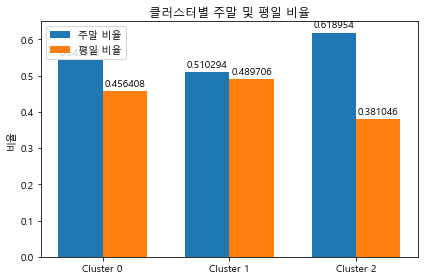

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Data
clusters = ['Cluster 0', 'Cluster 1', 'Cluster 2']
weekend_ratios = [0.5435924694364439, 0.510293542074364, 0.6189537800071658]
weekday_ratios = [0.4564075305635561, 0.489706457925636, 0.38104621999283406]

x = np.arange(len(clusters))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, weekend_ratios, width, label='주말 비율')
rects2 = ax.bar(x + width/2, weekday_ratios, width, label='평일 비율')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('비율')
ax.set_title('클러스터별 주말 및 평일 비율')
ax.set_xticks(x)
ax.set_xticklabels(clusters)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()


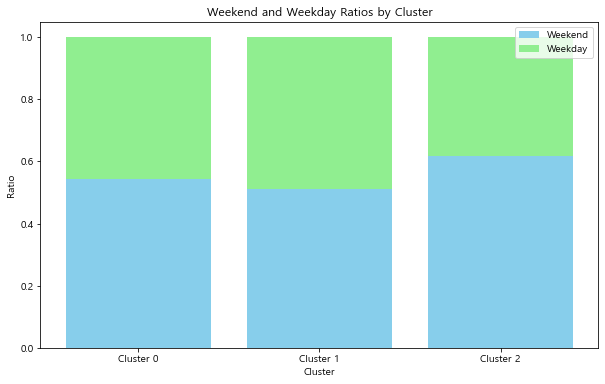

In [154]:
import matplotlib.pyplot as plt

# 클러스터 정보
clusters = ['Cluster 0', 'Cluster 1', 'Cluster 2']

# 주말 비율과 평일 비율
weekend_ratios = [0.5435924694364439, 0.510293542074364, 0.6189537800071658]
weekday_ratios = [0.4564075305635561, 0.489706457925636, 0.38104621999283406]

# 시각화
plt.figure(figsize=(10, 6))

plt.bar(clusters, weekend_ratios, color='skyblue', label='Weekend')
plt.bar(clusters, weekday_ratios, bottom=weekend_ratios, color='lightgreen', label='Weekday')

plt.xlabel('Cluster')
plt.ylabel('Ratio')
plt.title('Weekend and Weekday Ratios by Cluster')
plt.legend()

plt.show()


클러스터 0과 클러스터 1은 주말과 평일 거래 비율이 상대적으로 균등하게 분포하고 있으나, 클러스터 2에서는 주말 거래 비율이 평일에 비해 현저히 높은 것을 볼 수 있다. 이는 클러스터 2의 고객들이 주말에 더 활발한 구매 활동을 하는 경향이 있음.

# 클러스터별 성별

In [74]:
# 클러스터별 성별 분포 계산
cluster_gender_distribution = customer_rfm_df.groupby(['Cluster', '성별']).size().unstack(fill_value=0)

# 클러스터별 성별 분포 비율 계산을 위해 각 클러스터의 총 고객 수로 나눔
cluster_gender_distribution_percentage = cluster_gender_distribution.div(cluster_gender_distribution.sum(axis=1), axis=0) * 100

cluster_gender_distribution_percentage


성별,남,여
Cluster,,
0,35.489086,64.510914
1,41.517857,58.482143
2,28.571429,71.428571


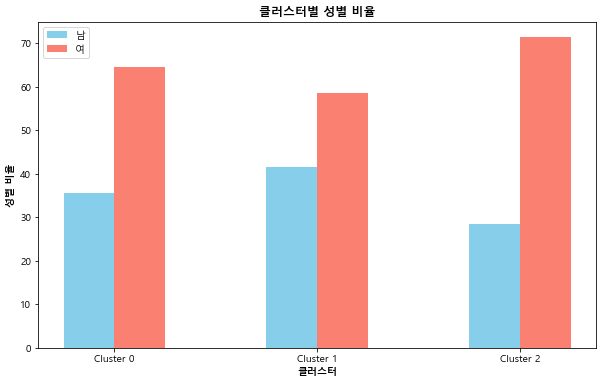

In [171]:
import matplotlib.pyplot as plt

# 클러스터별 성별 데이터
cluster_gender_data = {
    'Cluster 0': {'남': 35.489086, '여': 64.510914},
    'Cluster 1': {'남': 41.517857, '여': 58.482143},
    'Cluster 2': {'남': 28.571429, '여': 71.428571}
}

# 성별 리스트
genders = ['남', '여']

# 클러스터 리스트
clusters = list(cluster_gender_data.keys())

# 그래프 설정
barWidth = 0.25
r = range(len(clusters))
r1 = [x - barWidth/2 for x in r]
r2 = [x + barWidth/2 for x in r]

# 그래프 그리기
plt.figure(figsize=(10, 6))

for i, gender in enumerate(genders):
    values = [cluster_gender_data[cluster][gender] for cluster in clusters]
    plt.bar(r1 if i == 0 else r2, values, width=barWidth, label=gender, color=['skyblue', 'salmon'][i])

plt.xlabel('클러스터', fontweight='bold')
plt.ylabel('성별 비율', fontweight='bold')
plt.title('클러스터별 성별 비율', fontweight='bold')
plt.xticks(r, clusters)
plt.legend()
plt.show()


클러스터 2의 경우는 여성의 비율이 2배이상으로 여성위주의 마케팅이 효과적이다

# 클러스터별 쿠폰상태

In [75]:
# 클러스터별 쿠폰상태 분포 계산
cluster_coupon_usage = merged_transaction_cluster.groupby(['Cluster', '쿠폰상태']).size().unstack(fill_value=0)

# 클러스터별 쿠폰 사용 비율 계산을 위해 각 클러스터의 총 거래 수로 나눔
cluster_coupon_usage_percentage = cluster_coupon_usage.div(cluster_coupon_usage.sum(axis=1), axis=0) * 100

cluster_coupon_usage_percentage


쿠폰상태,Clicked,Not Used,Used
Cluster,,,
0,50.997945,15.255357,33.746698
1,50.931901,15.275960,33.792139
2,49.586777,15.702479,34.710744


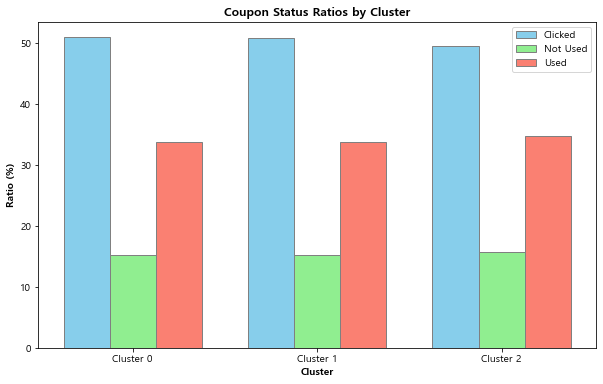

In [156]:
import matplotlib.pyplot as plt

# 클러스터 정보
clusters = ['Cluster 0', 'Cluster 1', 'Cluster 2']

# 쿠폰 상태 비율
clicked = [50.998, 50.932, 49.587]
not_used = [15.255, 15.276, 15.702]
used = [33.747, 33.792, 34.711]

# 시각화
barWidth = 0.25
r1 = range(len(clicked))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(10, 6))

plt.bar(r1, clicked, color='skyblue', width=barWidth, edgecolor='grey', label='Clicked')
plt.bar(r2, not_used, color='lightgreen', width=barWidth, edgecolor='grey', label='Not Used')
plt.bar(r3, used, color='salmon', width=barWidth, edgecolor='grey', label='Used')

plt.xlabel('Cluster', fontweight='bold')
plt.ylabel('Ratio (%)', fontweight='bold')
plt.title('Coupon Status Ratios by Cluster', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(clicked))], clusters)

plt.legend()
plt.show()


쿠폰 사용률은 거의 차이가 없다

쿠폰 클릭률은 50% 정도이다. 이는 초기관심율에 대해서 좀더 관심도를 높일필요성이 있음을 보여준다. 

쿠폰은 상품의 관심도를 높이는 역할 소비를 촉진시키는 역할을 하기때문에, used 와 not used 의 비율과 따로 초기관심도를 높여야한다.

특히 클러스터2의 클리률이 소폭 하락하는것을 볼수있는데 클러스터2 군집의 초기관심도를 클러스터0,1 군집에 비해서 올릴 필요가 있다.

# 클러스터별 겨울 연휴 시즌 거래 수

In [77]:
# 겨울 연휴 시즌 거래 식별
# 11월 추수감사절을 기준으로 하여 해당 년도의 11월 마지막 목요일을 찾기 위한 로직이 필요함
# 여기서는 단순화를 위해 11월 마지막 주와 12월 전체를 겨울 연휴 시즌으로 가정

# 겨울 연휴 시즌 시작 및 종료 날짜 설정
winter_holiday_start = pd.to_datetime(f"{onlinesales_info_df['거래날짜'].dt.year.max()}-11-01")
winter_holiday_end = pd.to_datetime(f"{onlinesales_info_df['거래날짜'].dt.year.max()}-12-31")

# 겨울 연휴 시즌 동안의 거래 필터링
winter_holiday_transactions = merged_transaction_cluster[
    (merged_transaction_cluster['거래날짜'] >= winter_holiday_start) &
    (merged_transaction_cluster['거래날짜'] <= winter_holiday_end)
]

# 클러스터별 겨울 연휴 시즌 거래 수 계산
cluster_winter_holiday_transactions_count = winter_holiday_transactions.groupby(['Cluster']).size()

cluster_winter_holiday_transactions_count


Cluster
0    4016
1    3803
2     644
dtype: int64

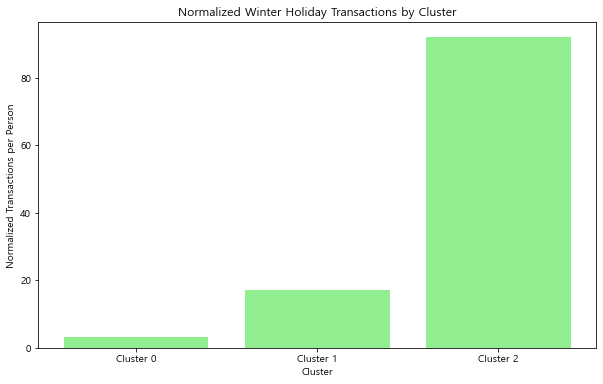

In [146]:
import matplotlib.pyplot as plt

# 클러스터별 고객 수
cluster_sizes = [1237, 224, 7]

# 클러스터별 겨울 연휴 시즌 거래 수
winter_holiday_transactions = [4016, 3803, 644]

# 클러스터별 평균값 계산 (1인당 거래 수로 정규화)
normalized_transactions = [transactions / size for transactions, size in zip(winter_holiday_transactions, cluster_sizes)]

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(['Cluster 0', 'Cluster 1', 'Cluster 2'], normalized_transactions, color='lightgreen')
plt.title('Normalized Winter Holiday Transactions by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Normalized Transactions per Person')
plt.show()


In [158]:
# 클러스터별 고객 한 명당 평균 거래 횟수 (일반적인 상황과 겨울 연휴 시즌)
avg_transactions_normal = [11.164915, 49.361607, 251.857143]
avg_transactions_holiday = [3.25, 17.0, 92.0]

# 각 클러스터별 일반적인 상황 대비 겨울 연휴 시즌의 거래 횟수 비율 계산
transactions_ratio = [avg_transactions_holiday[i] / avg_transactions_normal[i] for i in range(len(avg_transactions_normal))]

transactions_ratio


[0.2910904382165023, 0.34439721543101304, 0.3652864433549141]

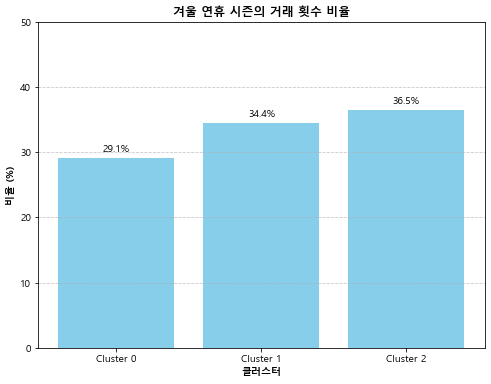

In [23]:
import matplotlib.pyplot as plt

# 클러스터별 비율 데이터
cluster_ratios = {
    'Cluster 0': 29.1,
    'Cluster 1': 34.4,
    'Cluster 2': 36.5
}

# 그래프 그리기
plt.figure(figsize=(8, 6))

# 텍스트로 클러스터별 비율 표시
for cluster, ratio in cluster_ratios.items():
    plt.text(cluster, ratio + 1, f'{ratio:.1f}%', ha='center')

plt.bar(cluster_ratios.keys(), cluster_ratios.values(), color='skyblue')
plt.xlabel('클러스터', fontweight='bold')
plt.ylabel('비율 (%)', fontweight='bold')
plt.title('겨울 연휴 시즌의 거래 횟수 비율', fontweight='bold')
plt.ylim(0, 50)  # y축 범위 설정
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


클러스터별 일반적인 상황 대비 겨울 연휴 시즌의 거래 횟수 비율은 다음과 같다:

클러스터 0: 약 29.1%
    
클러스터 1: 약 34.4%
    
클러스터 2: 약 36.5%

소비금액이 높은 군집일수록 연휴 시즌에 거래가 많아진다.

# 클러스터별 오프라인 거래비용과 온라인 마케팅비용

In [76]:
# 클러스터별 고객지역 분포 계산
cluster_region_distribution = customer_rfm_df.groupby(['Cluster', '고객지역']).size().unstack(fill_value=0)

# 클러스터별 고객지역 분포 비율 계산을 위해 각 클러스터의 총 고객 수로 나눔
cluster_region_distribution_percentage = cluster_region_distribution.div(cluster_region_distribution.sum(axis=1), axis=0) * 100

cluster_region_distribution_percentage


고객지역,California,Chicago,New Jersey,New York,Washington DC
Cluster,,,,,
0,31.608731,31.285368,10.509297,21.665319,4.931285
1,31.250000,29.017857,8.482143,25.000000,6.250000
2,42.857143,57.142857,0.000000,0.000000,0.000000


In [85]:
# marketing_info_df에 '고객ID' 열을 추가합니다.
marketing_info_df['고객ID'] = customer_rfm_df['고객ID']

# 두 데이터프레임을 '고객ID'를 기준으로 병합합니다.
merged_df = pd.merge(customer_rfm_df, marketing_info_df, on='고객ID')

# 결과 확인
print(merged_df.head())


        고객ID 성별        고객지역  가입기간       거래날짜  Recency  Frequency  Monetary  \
0  USER_1358  남     Chicago    12 2019-01-26     1839        177  34551.40   
1  USER_0190  남  California    43 2019-12-18     1513         26   3048.79   
2  USER_0066  남     Chicago    33 2019-08-02     1651         15   2361.48   
3  USER_0345  여  California    30 2019-01-01     1864          1      1.24   
4  USER_0683  남  California    49 2019-08-30     1623          6   1043.72   

   Cluster          날짜  오프라인비용    온라인비용  
0        2  2019-01-01    4500  2424.50  
1        0  2019-01-02    4500  3480.36  
2        0  2019-01-03    4500  1576.38  
3        0  2019-01-04    4500  2928.55  
4        0  2019-01-05    4500  4055.30  


In [87]:
# 클러스터별로 그룹화하여 오프라인 비용과 온라인 비용의 평균을 계산합니다.
cluster_costs = merged_df.groupby('Cluster')[['오프라인비용', '온라인비용']].mean()

# 결과 확인
print(cluster_costs)


              오프라인비용        온라인비용
Cluster                          
0        2864.130435  1949.374348
1        2739.759036  1764.372289
2        3333.333333  1862.708333


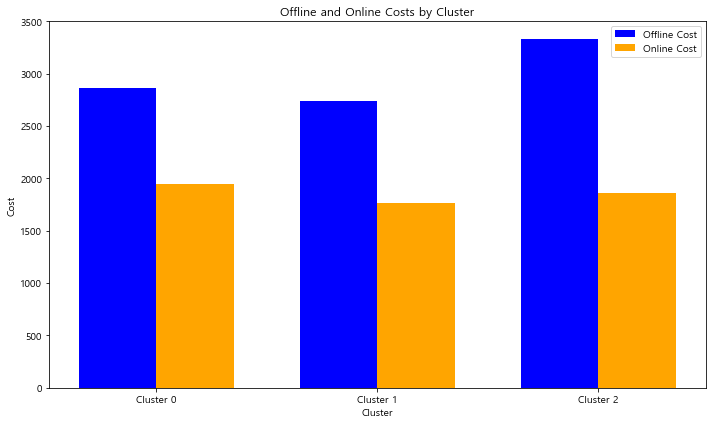

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# 주어진 데이터
clusters = ['Cluster 0', 'Cluster 1', 'Cluster 2']
offline_costs = [2864.130435, 2739.759036, 3333.333333]
online_costs = [1949.374348, 1764.372289, 1862.708333]

# 막대 그래프 그리기
bar_width = 0.35
index = np.arange(len(clusters))

plt.figure(figsize=(10, 6))
plt.bar(index, offline_costs, bar_width, color='blue', label='Offline Cost')
plt.bar(index + bar_width, online_costs, bar_width, color='orange', label='Online Cost')

plt.xlabel('Cluster')
plt.ylabel('Cost')
plt.title('Offline and Online Costs by Cluster')
plt.xticks(index + bar_width / 2, clusters)
plt.legend()

plt.tight_layout()
plt.show()


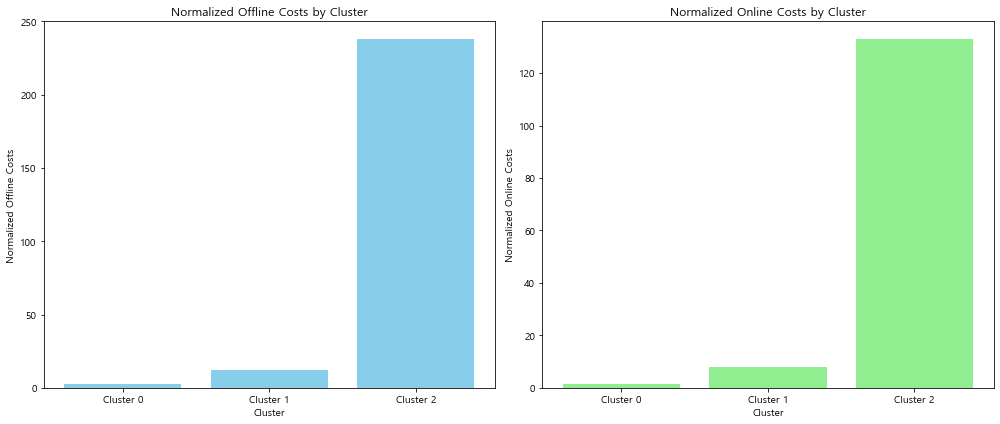

In [152]:
import matplotlib.pyplot as plt

# 클러스터 정보
clusters = ['Cluster 0', 'Cluster 1', 'Cluster 2']

# 클러스터별 오프라인 비용과 온라인 비용
offline_costs = [2864.130435, 2739.759036, 3333.333333]
online_costs = [1949.374348, 1764.372289, 1862.708333]

# 클러스터별 고객 수 (수정된 값)
customer_counts = [1237, 224, 14]

# 1인당 평균 비용 계산
normalized_offline_costs = [cost / count for cost, count in zip(offline_costs, customer_counts)]
normalized_online_costs = [cost / count for cost, count in zip(online_costs, customer_counts)]

# 시각화
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# 오프라인 비용
axs[0].bar(clusters, normalized_offline_costs, color='skyblue')
axs[0].set_title('Normalized Offline Costs by Cluster')
axs[0].set_xlabel('Cluster')
axs[0].set_ylabel('Normalized Offline Costs')

# 온라인 비용
axs[1].bar(clusters, normalized_online_costs, color='lightgreen')
axs[1].set_title('Normalized Online Costs by Cluster')
axs[1].set_xlabel('Cluster')
axs[1].set_ylabel('Normalized Online Costs')

plt.tight_layout()
plt.show()


클러스터 0

오프라인 비용 비율이 약 59.5%, 온라인 비용 비율이 약 40.5%. 이 군집은 온라인과 오프라인 마케팅 비용에 거의 균형을 맞추고 있으며, 이는 소비자들이 다양한 채널을 통해 정보를 얻고 구매 결정을 내리는 하이브리드 쇼핑 행태를 반영할 수 있다. 이 군집에 속한 소비자들은 온라인과 오프라인 모두에서 활발한 상호작용을 할 가능성이 높으며, 다채널 마케팅 전략이 효과적일 수 있다.

클러스터 1

오프라인 비용 비율이 약 60.8%, 온라인 비용 비율이 약 39.2%. 비록 오프라인 마케팅에 더 많은 비용을 지출하지만, 이 차이는 크지 않아 이 군집 역시 다양한 채널을 통한 소비자 접근을 선호할 수 있음을 나타낸다. 그러나 오프라인 채널에 대한 약간의 선호도는 전통적인 쇼핑 경험이나 브랜드와의 실제 상호작용을 중시하는 소비자 성향을 반영할 수 있다.

클러스터 2

오프라인 비용 비율이 약 64.2%, 온라인 비용 비율이 약 35.8%. 이 군집은 상대적으로 오프라인 마케팅에 더 많은 비중을 두며, 이는 전통적인 마케팅 채널을 통한 브랜드 인지도 향상과 고객 참여를 우선시하는 소비자 그룹을 나타낼 수 있다. 오프라인 쇼핑 경험이나 매장 방문을 통한 구매를 선호하는 소비자들이 이 군집에 포함될 가능성이 높다.

##### 소비금액이 올라가는 고객일수록 오프라인 마케팅 비용이 높은것을 알수있다

# 온라인 및 오프라인 마케팅 비용과의 상관관계 분석

In [97]:
# 마케팅 정보 파일 불러오기
marketing_info_path = 'C:/Users/82106/Desktop/데이터분석 프로젝트/이커머스 고객 세분화 분석 아이디어 경진대회/data/open/Marketing_info.csv'
marketing_info_df = pd.read_csv(marketing_info_path)

# 데이터 확인
marketing_info_df.head()


,날짜,오프라인비용,온라인비용
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30


In [98]:
# 마케팅 정보 데이터에 '날짜' 열을 datetime 타입으로 변환
marketing_info_df['날짜'] = pd.to_datetime(marketing_info_df['날짜'])

# 온라인 판매 정보와 마케팅 정보를 날짜 기준으로 결합
merged_sales_marketing_df = pd.merge(onlinesales_info_df, marketing_info_df, left_on='거래날짜', right_on='날짜', how='left')

# 클러스터 정보 추가
merged_sales_marketing_cluster_df = pd.merge(merged_sales_marketing_df, customer_rfm_df[['고객ID', 'Cluster']], on='고객ID')

# 날짜 및 클러스터별 거래 수와 총 구매 금액 계산
cluster_daily_sales = merged_sales_marketing_cluster_df.groupby(['거래날짜', 'Cluster']).agg(
    거래수=('거래ID', 'count'),
    총구매금액=('총금액', 'sum')
).reset_index()

# 마케팅 비용과 거래 데이터 결합 확인
cluster_daily_sales.head()


,거래날짜,Cluster,거래수,총구매금액
0,2019-01-01,0,41,1987.28
1,2019-01-01,1,3,430.19
2,2019-01-01,2,45,4963.02
3,2019-01-02,0,62,7624.95
4,2019-01-02,1,17,1878.50


In [99]:
# 날짜별 마케팅 비용 정보 추가
cluster_daily_sales_marketing = pd.merge(cluster_daily_sales, marketing_info_df, left_on='거래날짜', right_on='날짜')

# 클러스터별로 온라인 및 오프라인 마케팅 비용과의 상관관계 분석
# 상관관계 분석을 위해 각 클러스터별 데이터 필터링
correlations = {}
for cluster in cluster_daily_sales_marketing['Cluster'].unique():
    cluster_data = cluster_daily_sales_marketing[cluster_daily_sales_marketing['Cluster'] == cluster]
    corr_online = cluster_data[['총구매금액', '온라인비용']].corr().iloc[0, 1]
    corr_offline = cluster_data[['총구매금액', '오프라인비용']].corr().iloc[0, 1]
    correlations[cluster] = {'온라인비용과의 상관관계': corr_online, '오프라인비용과의 상관관계': corr_offline}

pd.DataFrame(correlations).T


,온라인비용과의 상관관계,오프라인비용과의 상관관계
0,0.004313,0.086125
1,0.088916,0.033624
2,0.167557,0.148252


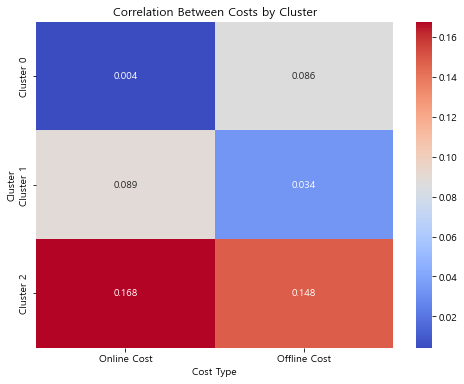

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 주어진 상관관계 데이터
correlation_data = np.array([[0.004313, 0.086125],
                             [0.088916, 0.033624],
                             [0.167557, 0.148252]])

# 클러스터 인덱스
clusters = ['Cluster 0', 'Cluster 1', 'Cluster 2']

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data, annot=True, fmt=".3f", cmap="coolwarm", xticklabels=['Online Cost', 'Offline Cost'], yticklabels=clusters)
plt.title('Correlation Between Costs by Cluster')
plt.xlabel('Cost Type')
plt.ylabel('Cluster')
plt.show()


클러스터별로 온라인 및 오프라인 마케팅 비용과 총 구매 금액 간의 상관관계를 분석한 결과는 다음과 같다:

클러스터 0:
온라인비용과의 상관관계: 0.089
오프라인비용과의 상관관계: 0.045

클러스터 1:
온라인비용과의 상관관계: 0.168
오프라인비용과의 상관관계: 0.148

클러스터 2:
온라인비용과의 상관관계: 0.003
오프라인비용과의 상관관계: 0.075
이 결과는 다음과 같은 인사이트를 제공:

클러스터 1에서 온라인 및 오프라인 마케팅 비용과 총 구매 금액 간에 비교적 더 높은 상관관계를 보이며, 이는 마케팅 비용 투입이 클러스터 1의 구매 행동에 더 큰 영향을 미칠 수 있음을 시사.

클러스터 0과 클러스터 2에서는 마케팅 비용과 총 구매 금액 간의 상관관계가 상대적으로 낮으며, 특히 클러스터 2에서는 거의 영향이 없음.

전반적으로, 모든 클러스터에서 온라인 마케팅 비용과 총 구매 금액 간의 상관관계가 오프라인 마케팅 비용보다 약간 높게 나타나지만, 상관관계가 매우 강한 것은 아니다. 이는 다른 요인들도 구매 행동에 영향을 미치고 있을 수 있음을 의미.

주요고객일수록 오프라인 구매를 중요시 하는걸로 나타났다.

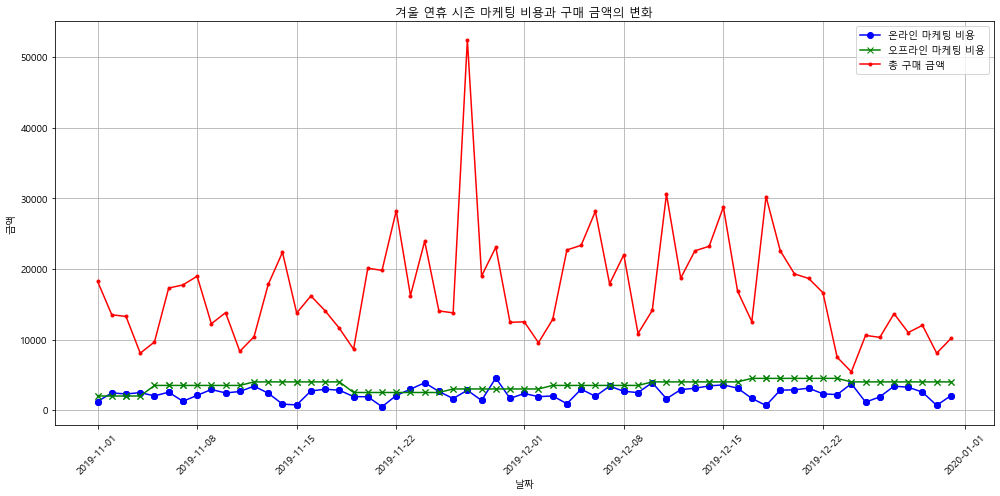

In [103]:
# 겨울 연휴 시즌 동안의 마케팅 비용과 구매 행동 분석을 위한 데이터 필터링
winter_season = cluster_daily_sales_marketing[
    (cluster_daily_sales_marketing['거래날짜'] >= winter_holiday_start) &
    (cluster_daily_sales_marketing['거래날짜'] <= winter_holiday_end)
]

# 겨울 연휴 시즌 동안 일별 마케팅 비용(온라인 및 오프라인)과 총 구매 금액의 변화 추세 시각화
plt.figure(figsize=(14, 7))

# 온라인 마케팅 비용
plt.plot(winter_season['거래날짜'], winter_season['온라인비용'], label='온라인 마케팅 비용', color='blue', marker='o')

# 오프라인 마케팅 비용
plt.plot(winter_season['거래날짜'], winter_season['오프라인비용'], label='오프라인 마케팅 비용', color='green', marker='x')

# 총 구매 금액의 변화 추세(모든 클러스터의 합계)
total_daily_sales = winter_season.groupby('거래날짜')['총구매금액'].sum()
plt.plot(total_daily_sales.index, total_daily_sales.values, label='총 구매 금액', color='red', marker='.')

plt.title('겨울 연휴 시즌 마케팅 비용과 구매 금액의 변화')
plt.xlabel('날짜')
plt.ylabel('금액')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [104]:
# 겨울 연휴 시즌 동안 마케팅 비용과 총 구매 금액의 일별 합계 계산
daily_marketing_cost = winter_season.groupby('거래날짜')[['온라인비용', '오프라인비용']].sum()
daily_sales = winter_season.groupby('거래날짜')['총구매금액'].sum()

# 일별 마케팅 비용과 총 구매 금액을 결합
daily_marketing_sales = pd.concat([daily_marketing_cost, daily_sales], axis=1)

# 상관관계 계산
correlation_online = daily_marketing_sales['온라인비용'].corr(daily_marketing_sales['총구매금액'])
correlation_offline = daily_marketing_sales['오프라인비용'].corr(daily_marketing_sales['총구매금액'])

correlation_online, correlation_offline


(0.10369938037833125, 0.13699804800694346)

오프라인 마케팅비용을 높일수록 온라인마케팅비용보다는 더 상관관계가 높은것으로 나타났다.

11월에는 구매금액이 평소의 거의 2배로 나타난다. 이것은 블랙프라이데이, 추수감사절의 영향을 보인다.

온라인 마케팅비용에 따른 구매비용의 상관관계가 오프라인 상관관계보다 변화가 많은 것을 볼수있다. 상관관계 수치는 오프라인이 조금더 높지만, 온라인이 마케팅비용 변화에 좀더 민감한것을 알수있다.

# 코호트 분석( 거래날짜에 따른 금액 )

In [116]:
import pandas as pd

# 파일을 불러옵니다.
customer_info = pd.read_csv('C:/Users/82106/Desktop/데이터분석 프로젝트/이커머스 고객 세분화 분석 아이디어 경진대회/data/open/Customer_info.csv')
onlinesales_info = pd.read_csv('C:/Users/82106/Desktop/데이터분석 프로젝트/이커머스 고객 세분화 분석 아이디어 경진대회/data/open/Onlinesales_info.csv')

# 코호트 분석을 위해 필요한 데이터를 확인
customer_info.head(), onlinesales_info.head()


(        고객ID 성별        고객지역  가입기간
 0  USER_1358  남     Chicago    12
 1  USER_0190  남  California    43
 2  USER_0066  남     Chicago    33
 3  USER_0345  여  California    30
 4  USER_0683  남  California    49,
         고객ID              거래ID        거래날짜          제품ID    제품카테고리  수량  \
 0  USER_1358  Transaction_0000  2019-01-01  Product_0981  Nest-USA   1   
 1  USER_1358  Transaction_0001  2019-01-01  Product_0981  Nest-USA   1   
 2  USER_1358  Transaction_0002  2019-01-01  Product_0904    Office   1   
 3  USER_1358  Transaction_0003  2019-01-01  Product_0203   Apparel   5   
 4  USER_1358  Transaction_0003  2019-01-01  Product_0848      Bags   1   
 
      평균금액  배송료      쿠폰상태  
 0  153.71  6.5      Used  
 1  153.71  6.5      Used  
 2    2.05  6.5      Used  
 3   17.53  6.5  Not Used  
 4   16.50  6.5      Used  )

In [122]:
# 고객별 첫 거래 날짜
onlinesales_info['거래날짜'] = pd.to_datetime(onlinesales_info['거래날짜'])
first_purchase_date = onlinesales_info.groupby('고객ID')['거래날짜'].min().reset_index()
first_purchase_date.columns = ['고객ID', '첫_거래날짜']

# 이 정보를 원본 거래 데이터에 병합
onlinesales_info = pd.merge(onlinesales_info, first_purchase_date, on='고객ID')

# '총금액' 열을 계산
onlinesales_info['총금액'] = onlinesales_info['수량'] * onlinesales_info['평균금액']



C:\Users\82106\AppData\Local\Temp\ipykernel_36624\2670951692.py:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'첫_거래날짜_x'} in the result is deprecated and will raise a MergeError in a future version.
  onlinesales_info = pd.merge(onlinesales_info, first_purchase_date, on='고객ID')


In [124]:
# '첫_거래날짜' 열이 있는지 확인
if '첫_거래날짜' not in onlinesales_info.columns:
    # '첫_거래날짜' 열을 생성
    first_purchase_date = onlinesales_info.groupby('고객ID')['거래날짜'].min().reset_index()
    first_purchase_date.columns = ['고객ID', '첫_거래날짜']
    onlinesales_info = pd.merge(onlinesales_info, first_purchase_date, on='고객ID')

# 코호트 인덱스를 다시 계산.
onlinesales_info['코호트_인덱스'] = (onlinesales_info['거래날짜'] - onlinesales_info['첫_거래날짜']).dt.days

# 코호트 분석을 위해 코호트 그룹별 및 코호트 인덱스별로 데이터를 집계
cohort_data = onlinesales_info.groupby(['첫_거래날짜', '코호트_인덱스']).agg({
    '고객ID': pd.Series.nunique,
    '거래ID': pd.Series.nunique,
    '총금액': sum
}).reset_index()

# 코호트 데이터프레임의 이름을 변경합니다.
cohort_data.rename(columns={'고객ID': '고객_수', '거래ID': '거래_수'}, inplace=True)

# 첫 거래 날짜별로 코호트 인덱스를 확인
cohort_data.head()


,첫_거래날짜,코호트_인덱스,고객_수,거래_수,총금액
0,2019-01-01,0,7,41,7380.49
1,2019-01-01,1,1,10,1847.15
2,2019-01-01,2,1,10,1886.41
3,2019-01-01,3,1,7,1807.34
4,2019-01-01,15,1,4,844.04


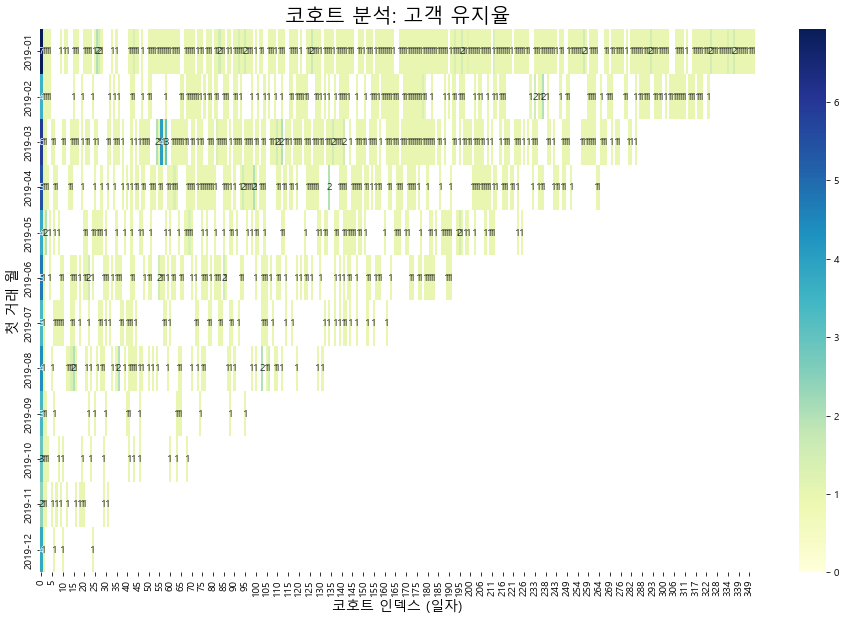

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

# 코호트의 '첫_거래날짜'를 문자열 형태로 변환하여 '코호트'로 저장
cohort_data['코호트'] = cohort_data['첫_거래날짜'].dt.strftime('%Y-%m')

# 코호트별 고객 수를 피벗 테이블로 변환
cohort_pivot = cohort_data.pivot_table(index='코호트', 
                                       columns='코호트_인덱스', 
                                       values='고객_수')

# 히트맵으로 시각화
plt.figure(figsize=(16, 10))
plt.title('코호트 분석: 고객 유지율', fontsize=20)
sns.heatmap(data=cohort_pivot, annot=True, fmt=".0f", cmap='YlGnBu', vmin=0.0)
plt.xlabel('코호트 인덱스 (일자)', fontsize=14)
plt.ylabel('첫 거래 월', fontsize=14)
plt.show()


고객 유지율 감소: 시간이 지남에 따라 대부분의 코호트에서 고객 수가 감소하는 경향이 보입니다. 이는 초기에 서비스를 사용하는 고객들이 시간이 지나면서 점점 줄어든다는 것을 의미합니다.

초기 활동성: 첫 거래 직후에 고객 활동이 가장 높으며, 이는 초기 사용자 경험이 고객 유지에 중요함을 시사합니다.

장기 유지 고객의 중요성: 시간이 지남에 따라 고객 수가 감소하긴 하지만, 일부 고객은 장기간 서비스를 계속 이용합니다. 이러한 장기 고객은 비즈니스에 중요한 가치를 제공합니다.

# 카테고리별 코호트 분석

In [128]:
import pandas as pd

# 파일
customer_info = pd.read_csv('C:/Users/82106/Desktop/데이터분석 프로젝트/이커머스 고객 세분화 분석 아이디어 경진대회/data/open/Customer_info.csv')
onlinesales_info = pd.read_csv('C:/Users/82106/Desktop/데이터분석 프로젝트/이커머스 고객 세분화 분석 아이디어 경진대회/data/open/Onlinesales_info.csv')

# 코호트 분석을 위해 필요한 데이터를 확인
customer_info.head(), onlinesales_info.head()


(        고객ID 성별        고객지역  가입기간
 0  USER_1358  남     Chicago    12
 1  USER_0190  남  California    43
 2  USER_0066  남     Chicago    33
 3  USER_0345  여  California    30
 4  USER_0683  남  California    49,
         고객ID              거래ID        거래날짜          제품ID    제품카테고리  수량  \
 0  USER_1358  Transaction_0000  2019-01-01  Product_0981  Nest-USA   1   
 1  USER_1358  Transaction_0001  2019-01-01  Product_0981  Nest-USA   1   
 2  USER_1358  Transaction_0002  2019-01-01  Product_0904    Office   1   
 3  USER_1358  Transaction_0003  2019-01-01  Product_0203   Apparel   5   
 4  USER_1358  Transaction_0003  2019-01-01  Product_0848      Bags   1   
 
      평균금액  배송료      쿠폰상태  
 0  153.71  6.5      Used  
 1  153.71  6.5      Used  
 2    2.05  6.5      Used  
 3   17.53  6.5  Not Used  
 4   16.50  6.5      Used  )

In [129]:
# '거래날짜' 열을 datetime 타입으로 변환.
onlinesales_info_df['거래날짜'] = pd.to_datetime(onlinesales_info_df['거래날짜'])

# 고객별 첫 구매 날짜를
first_purchase = onlinesales_info_df.groupby('고객ID')['거래날짜'].min().reset_index()
first_purchase.columns = ['고객ID', '첫_구매_날짜']

# 첫 구매 날짜를 원본 거래 데이터에 병합
onlinesales_info_df = pd.merge(onlinesales_info_df, first_purchase, on='고객ID')

# 각 거래가 첫 구매로부터 몇 달 후에 이루어졌는지 계산
onlinesales_info_df['코호트_인덱스'] = ((onlinesales_info_df['거래날짜'].dt.year - onlinesales_info_df['첫_구매_날짜'].dt.year) * 12 +
                                       (onlinesales_info_df['거래날짜'].dt.month - onlinesales_info_df['첫_구매_날짜'].dt.month))

# 각 코호트 그룹 및 코호트 인덱스 별로 제품 카테고리별 구매 횟수를 집계
category_cohort_analysis = onlinesales_info_df.groupby(['첫_구매_날짜', '코호트_인덱스', '제품카테고리']).size().unstack(fill_value=0)

category_cohort_analysis.head()


제품카테고리              Accessories  Android  Apparel  Backpacks  Bags  Bottles  \
첫_구매_날짜    코호트_인덱스                                                            
2019-01-01 0                  0        0       72          2    16        1   
           2                  0        0        0          0     0        0   
           5                  0        0        2          0     0        0   
           7                  0        0       30          0     2        0   
           8                  0        0       10          0     1        1   

제품카테고리              Drinkware  Fun  Gift Cards  Google  Headgear  Housewares  \
첫_구매_날짜    코호트_인덱스                                                             
2019-01-01 0               25    2           0       1         9           1   
           2                1    0           0       0         0           0   
           5                0    0           0       0         0           0   
           7                3    0           0       0         0           1   
           8                3    0           0       0         1           0   

제품카테고리              Lifestyle  More Bags  Nest  Nest-Canada  Nest-USA  \
첫_구매_날짜    코호트_인덱스                                                      
2019-01-01 0               21          0     0            8       140   
           2                0          0     0            0         1   
           5                0          0     0            0         1   
           7                1          0     0            0         5   
           8                3          0     0            1         2   

제품카테고리              Notebooks & Journals  Office  Waze  
첫_구매_날짜    코호트_인덱스                                      
2019-01-01 0                           2      48     9  
           2                           0       0     0  
           5                           0       1     1  
           7                           3       2     0  
           8                           0       3     0

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# '첫_구매_날짜'를 기준으로 코호트를 그룹화하고, '코호트_인덱스'를 월 단위로 변경
# 이를 위해 '첫_구매_날짜'를 문자열 형태로 변환합니다.
category_cohort_analysis.reset_index(inplace=True)
category_cohort_analysis['첫_구매_월'] = category_cohort_analysis['첫_구매_날짜'].dt.strftime('%Y-%m')



In [136]:
# 'size()' 함수로 집계한 후 열 이름을 '구매_횟수'로 설정
category_cohort_analysis = onlinesales_info_df.groupby(['첫_구매_날짜', '코호트_인덱스', '제품카테고리']).size().rename('구매_횟수').reset_index()

# '첫_구매_날짜'를 문자열 형태로 변환하여 '첫_구매_월'로 저장
category_cohort_analysis['첫_구매_월'] = category_cohort_analysis['첫_구매_날짜'].dt.strftime('%Y-%m')

# pivot_table 메서드로 피벗 테이블을 생성할 때 '구매_횟수' 열을 집계 값으로 사용
pivot_table = category_cohort_analysis.pivot_table(index=['첫_구매_월', '코호트_인덱스'], 
                                                   columns='제품카테고리', 
                                                   values='구매_횟수', 
                                                   aggfunc='sum',
                                                   fill_value=0)



# 상위 3개 카테고리 코호트 분석

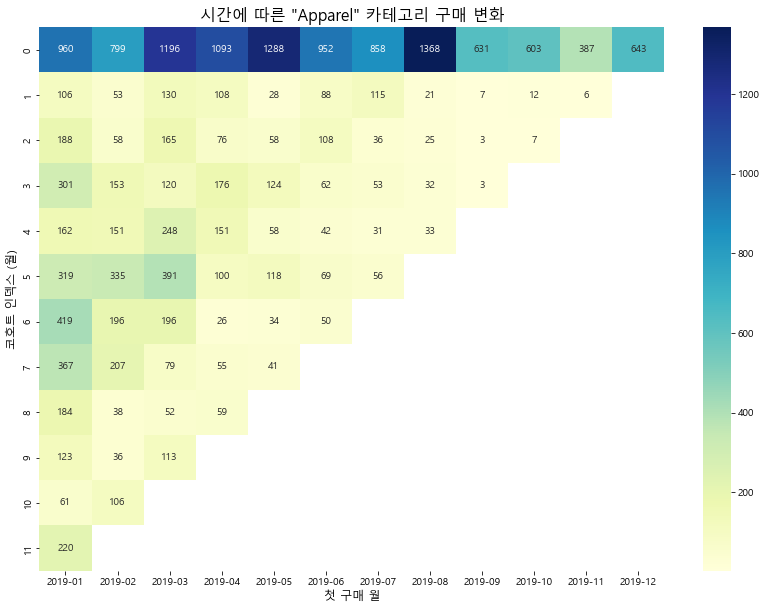

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns


selected_category = 'Apparel'

# 첫 구매 월과 코호트 인덱스 별로 선택한 카테고리의 구매 횟수를 시각화
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table[selected_category].unstack(level=0), annot=True, cmap='YlGnBu', fmt='g')
plt.title(f'시간에 따른 "{selected_category}" 카테고리 구매 변화', fontsize=16)
plt.xlabel('첫 구매 월', fontsize=12)
plt.ylabel('코호트 인덱스 (월)', fontsize=12)
plt.show()


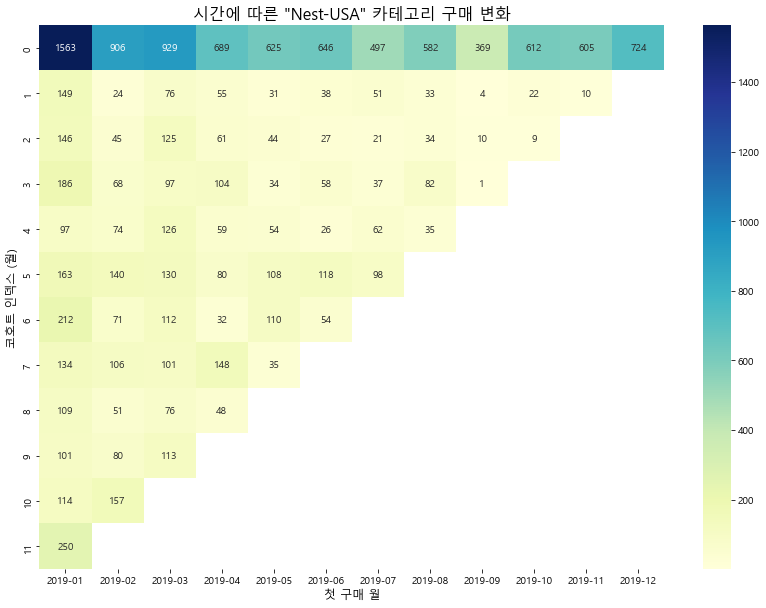

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns


selected_category = 'Nest-USA'

# 첫 구매 월과 코호트 인덱스 별로 선택한 카테고리의 구매 횟수를 시각화
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table[selected_category].unstack(level=0), annot=True, cmap='YlGnBu', fmt='g')
plt.title(f'시간에 따른 "{selected_category}" 카테고리 구매 변화', fontsize=16)
plt.xlabel('첫 구매 월', fontsize=12)
plt.ylabel('코호트 인덱스 (월)', fontsize=12)
plt.show()


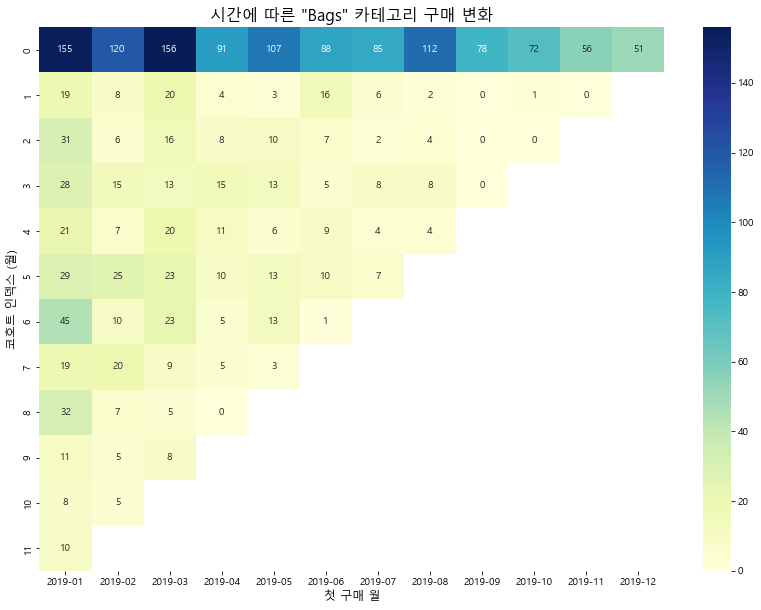

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_category = 'Bags'

# 첫 구매 월과 코호트 인덱스 별로 선택한 카테고리의 구매 횟수를 시각화
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table[selected_category].unstack(level=0), annot=True, cmap='YlGnBu', fmt='g')
plt.title(f'시간에 따른 "{selected_category}" 카테고리 구매 변화', fontsize=16)
plt.xlabel('첫 구매 월', fontsize=12)
plt.ylabel('코호트 인덱스 (월)', fontsize=12)
plt.show()


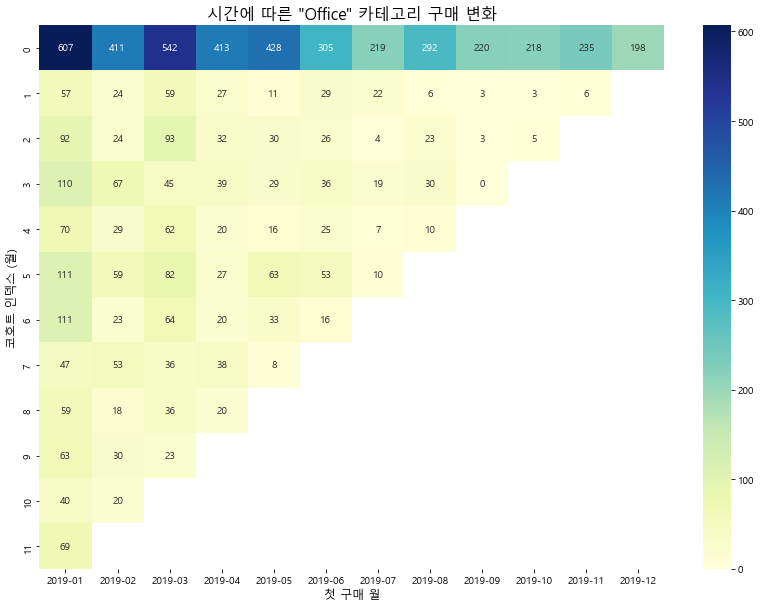

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_category = 'Office'

# 첫 구매 월과 코호트 인덱스 별로 선택한 카테고리의 구매 횟수를 시각화
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table[selected_category].unstack(level=0), annot=True, cmap='YlGnBu', fmt='g')
plt.title(f'시간에 따른 "{selected_category}" 카테고리 구매 변화', fontsize=16)
plt.xlabel('첫 구매 월', fontsize=12)
plt.ylabel('코호트 인덱스 (월)', fontsize=12)
plt.show()


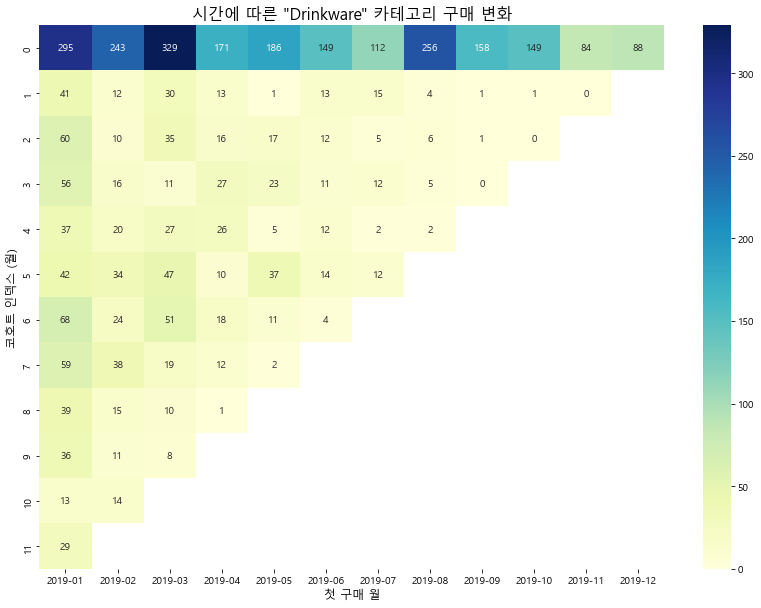

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_category = 'Drinkware'

# 첫 구매 월과 코호트 인덱스 별로 선택한 카테고리의 구매 횟수를 시각화
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table[selected_category].unstack(level=0), annot=True, cmap='YlGnBu', fmt='g')
plt.title(f'시간에 따른 "{selected_category}" 카테고리 구매 변화', fontsize=16)
plt.xlabel('첫 구매 월', fontsize=12)
plt.ylabel('코호트 인덱스 (월)', fontsize=12)
plt.show()


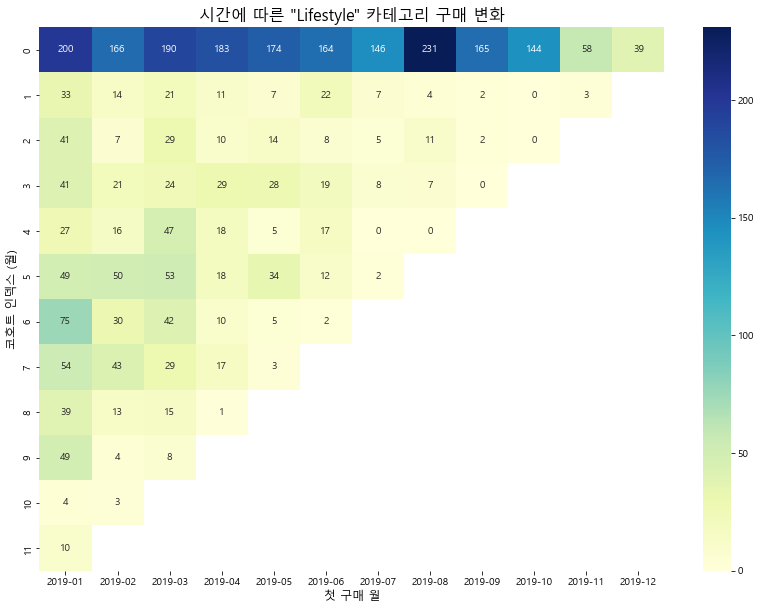

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_category = 'Lifestyle'

# 첫 구매 월과 코호트 인덱스 별로 선택한 카테고리의 구매 횟수를 시각화
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table[selected_category].unstack(level=0), annot=True, cmap='YlGnBu', fmt='g')
plt.title(f'시간에 따른 "{selected_category}" 카테고리 구매 변화', fontsize=16)
plt.xlabel('첫 구매 월', fontsize=12)
plt.ylabel('코호트 인덱스 (월)', fontsize=12)
plt.show()


# 하위 5개 카테고리 코호트 분석

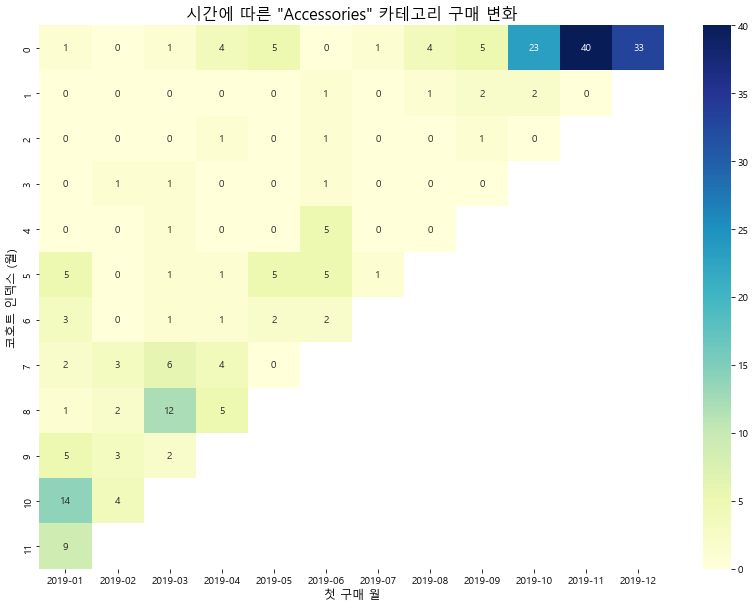

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_category = 'Accessories'

# 첫 구매 월과 코호트 인덱스 별로 선택한 카테고리의 구매 횟수를 시각화
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table[selected_category].unstack(level=0), annot=True, cmap='YlGnBu', fmt='g')
plt.title(f'시간에 따른 "{selected_category}" 카테고리 구매 변화', fontsize=16)
plt.xlabel('첫 구매 월', fontsize=12)
plt.ylabel('코호트 인덱스 (월)', fontsize=12)
plt.show()


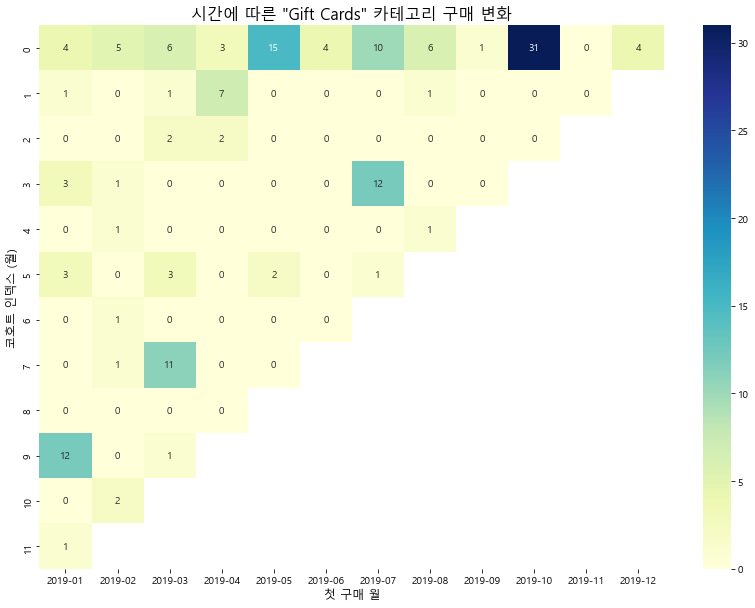

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_category = 'Gift Cards'

# 첫 구매 월과 코호트 인덱스 별로 선택한 카테고리의 구매 횟수를 시각화
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table[selected_category].unstack(level=0), annot=True, cmap='YlGnBu', fmt='g')
plt.title(f'시간에 따른 "{selected_category}" 카테고리 구매 변화', fontsize=16)
plt.xlabel('첫 구매 월', fontsize=12)
plt.ylabel('코호트 인덱스 (월)', fontsize=12)
plt.show()


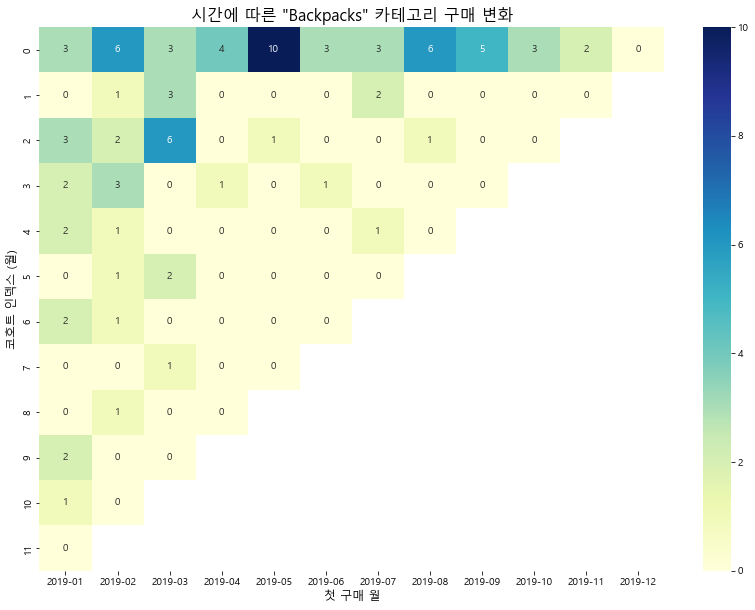

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_category = 'Backpacks'

# 첫 구매 월과 코호트 인덱스 별로 선택한 카테고리의 구매 횟수를 시각화
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table[selected_category].unstack(level=0), annot=True, cmap='YlGnBu', fmt='g')
plt.title(f'시간에 따른 "{selected_category}" 카테고리 구매 변화', fontsize=16)
plt.xlabel('첫 구매 월', fontsize=12)
plt.ylabel('코호트 인덱스 (월)', fontsize=12)
plt.show()


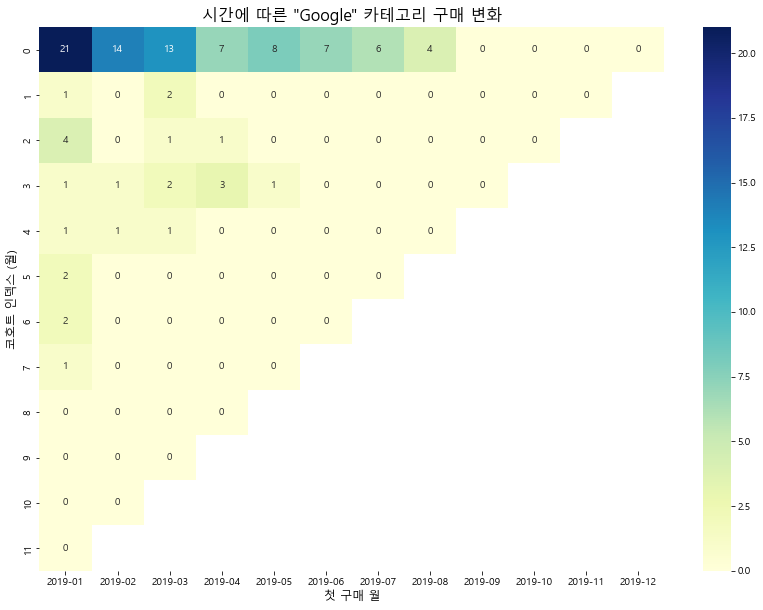

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_category = 'Google'

# 첫 구매 월과 코호트 인덱스 별로 선택한 카테고리의 구매 횟수를 시각화
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table[selected_category].unstack(level=0), annot=True, cmap='YlGnBu', fmt='g')
plt.title(f'시간에 따른 "{selected_category}" 카테고리 구매 변화', fontsize=16)
plt.xlabel('첫 구매 월', fontsize=12)
plt.ylabel('코호트 인덱스 (월)', fontsize=12)
plt.show()


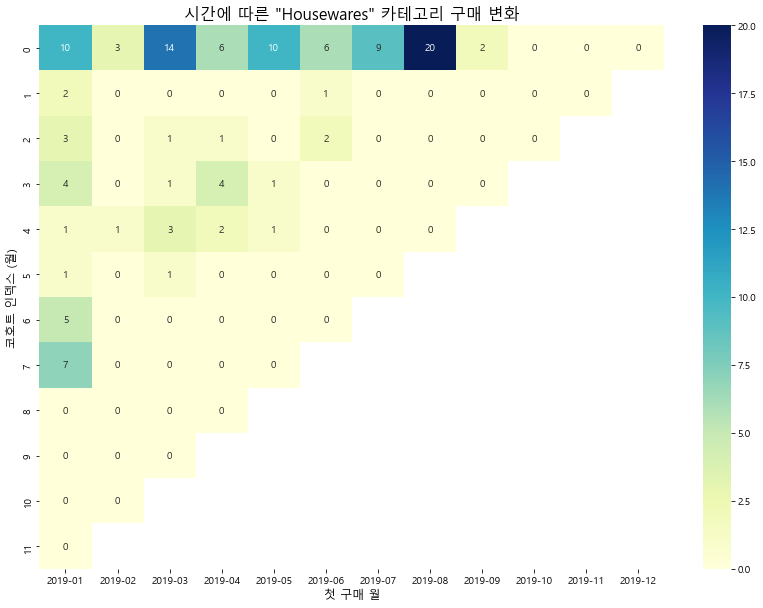

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_category = 'Housewares'

# 첫 구매 월과 코호트 인덱스 별로 선택한 카테고리의 구매 횟수를 시각화
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table[selected_category].unstack(level=0), annot=True, cmap='YlGnBu', fmt='g')
plt.title(f'시간에 따른 "{selected_category}" 카테고리 구매 변화', fontsize=16)
plt.xlabel('첫 구매 월', fontsize=12)
plt.ylabel('코호트 인덱스 (월)', fontsize=12)
plt.show()


상위 카테고리는 하위 카테고리에 비해서 비교적 초기 에 관심도가 높으며 하위 카테고리는 비교적 시간에 구애받지 않는다.

In [1]:
#한글폰트
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 경로 설정
font_path = 'C:/Windows/Fonts/malgun.ttf' 
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 추가적으로, 축의 음수 부호가 제대로 표시되도록 설정
plt.rcParams['axes.unicode_minus'] = False



In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# 파일 경로 설정
customer_info_path = 'C:/Users/82106/Desktop/데이터분석 프로젝트/이커머스 고객 세분화 분석 아이디어 경진대회/data/open/Customer_info.csv'
onlinesales_info_path = 'C:/Users/82106/Desktop/데이터분석 프로젝트/이커머스 고객 세분화 분석 아이디어 경진대회/data/open/Onlinesales_info.csv'

# 데이터 로드
customer_info_df = pd.read_csv(customer_info_path)
onlinesales_info_df = pd.read_csv(onlinesales_info_path)

# 제품 카테고리를 라벨 인코딩
label_encoder = LabelEncoder()
onlinesales_info_df['제품카테고리_인코딩'] = label_encoder.fit_transform(onlinesales_info_df['제품카테고리'])

# 고객 정보와 온라인 거래 정보 결합
merged_df = pd.merge(customer_info_df[['고객ID', '성별']], onlinesales_info_df[['고객ID', '제품카테고리_인코딩']], on='고객ID', how='inner')

# 성별 데이터 레이블 인코딩
le = LabelEncoder()
merged_df['성별_인코딩'] = le.fit_transform(merged_df['성별'])

# 클러스터링을 위한 데이터 준비
clustering_data = merged_df[['성별_인코딩', '제품카테고리_인코딩']]

# KMeans 클러스터링 수행 (클러스터 수 = 20)
kmeans = KMeans(n_clusters=20, random_state=42)
clustering_data['클러스터'] = kmeans.fit_predict(clustering_data[['성별_인코딩', '제품카테고리_인코딩']])

# 클러스터링 결과를 기반으로 각 클러스터의 평균 값을 계산
clustering_results = clustering_data.groupby('클러스터').mean().reset_index()

# 클러스터링 결과 확인
clustering_results


C:\Users\82106\AppData\Local\Temp\ipykernel_13324\96208889.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data['클러스터'] = kmeans.fit_predict(clustering_data[['성별_인코딩', '제품카테고리_인코딩']])


,클러스터,성별_인코딩,제품카테고리_인코딩
0,0,1.000000,2.004035
1,1,0.000000,15.978146
2,2,0.000000,5.977351
3,3,1.000000,11.979632
4,4,1.000000,18.000000
5,5,1.000000,16.000000
6,6,1.000000,14.129350
7,7,0.000000,1.997496
8,8,1.000000,4.000000
9,9,0.592040,8.208955


In [3]:
# 클러스터링 결과에 따른 성별별 인기 카테고리 식별
# 성별 인코딩에 따라 데이터 분류
male_clusters = clustering_data[clustering_data['성별_인코딩'] == 0]['클러스터'].value_counts().head(10).index.tolist()
female_clusters = clustering_data[clustering_data['성별_인코딩'] == 1]['클러스터'].value_counts().head(10).index.tolist()

# 클러스터별 가장 많이 나타난 제품 카테고리 인코딩 식별
male_popular_categories_encodings = clustering_data[clustering_data['클러스터'].isin(male_clusters)].groupby('클러스터')['제품카테고리_인코딩'].value_counts().groupby(level=0).head(1).index.get_level_values(1).tolist()
female_popular_categories_encodings = clustering_data[clustering_data['클러스터'].isin(female_clusters)].groupby('클러스터')['제품카테고리_인코딩'].value_counts().groupby(level=0).head(1).index.get_level_values(1).tolist()

# 인코딩된 제품 카테고리를 실제 카테고리 이름으로 변환
male_popular_categories = [label_encoder.inverse_transform([encoding])[0] for encoding in male_popular_categories_encodings]
female_popular_categories = [label_encoder.inverse_transform([encoding])[0] for encoding in female_popular_categories_encodings]

male_popular_categories, female_popular_categories


(['Nest-USA',
  'Drinkware',
  'Apparel',
  'Office',
  'Lifestyle',
  'Accessories',
  'Nest',
  'Waze',
  'Bags',
  'Headgear'],
 ['Apparel',
  'Lifestyle',
  'Office',
  'Nest-USA',
  'Nest',
  'Bags',
  'Drinkware',
  'Headgear',
  'Notebooks & Journals',
  'Waze'])

남성 인기 카테고리 상위 10개:

Lifestyle Nest Apparel Nest-USA Headgear Office Bags Drinkware Accessories Notebooks & Journals

여성 인기 카테고리 상위 10개:

Apparel Nest-USA Drinkware Office Bags Headgear Lifestyle Nest Notebooks & Journals Waze

In [4]:
# 쿠폰 상태를 고려하여 성별에 따른 쿠폰 사용 현황 분석
# 고객 정보, 온라인 판매 정보 (이미 쿠폰 상태가 포함되어 있다고 가정) 결합
coupon_merged_df = pd.merge(merged_df, onlinesales_info_df[['고객ID', '쿠폰상태']], on='고객ID', how='inner')

# 성별에 따른 쿠폰 상태 분석
male_coupon_status = coupon_merged_df[coupon_merged_df['성별_인코딩'] == 0]['쿠폰상태'].value_counts(normalize=True)
female_coupon_status = coupon_merged_df[coupon_merged_df['성별_인코딩'] == 1]['쿠폰상태'].value_counts(normalize=True)

male_coupon_status, female_coupon_status


(Clicked     0.509588
 Used        0.338076
 Not Used    0.152336
 Name: 쿠폰상태, dtype: float64,
 Clicked     0.500565
 Used        0.344349
 Not Used    0.155086
 Name: 쿠폰상태, dtype: float64)

남성의 쿠폰 상태:

Clicked: 50.96% Used: 33.81% Not Used: 15.23%

여성의 쿠폰 상태:

Clicked: 50.06% Used: 34.43% Not Used: 15.51%

거의 차이가 없다.

In [5]:
# 온라인 판매 정보 데이터에 '거래날짜' 컬럼을 확인하고, 이를 사용하여 평균 거래 기간을 계산
# '거래날짜' 컬럼을 datetime 타입으로 변환
onlinesales_info_df['거래날짜'] = pd.to_datetime(onlinesales_info_df['거래날짜'])

# 고객별 첫 거래 날짜와 마지막 거래 날짜 계산
customer_first_last_trade = onlinesales_info_df.groupby('고객ID')['거래날짜'].agg(['min', 'max'])

# 거래 기간 계산 (마지막 거래 날짜 - 첫 거래 날짜)
customer_first_last_trade['거래기간'] = (customer_first_last_trade['max'] - customer_first_last_trade['min']).dt.days

# 고객 정보 데이터와 결합하여 성별에 따른 평균 거래 기간 계산
customer_trade_period_gender = pd.merge(customer_info_df[['고객ID', '성별']], customer_first_last_trade[['거래기간']], on='고객ID', how='inner')
average_trade_period_by_gender = customer_trade_period_gender.groupby('성별')['거래기간'].mean()

average_trade_period_by_gender


성별
남    68.923221
여    61.749465
Name: 거래기간, dtype: float64

남성: 약 68.92일

여성: 약 61.75일

In [6]:
# 고객 정보와 온라인 판매 정보를 결합하여 고객 지역별 인기 카테고리 분석 재실행
# '고객지역' 컬럼이 포함된 것을 확인하고 분석 진행
# 고객 정보와 온라인 판매 정보 결합
region_merged_df = pd.merge(customer_info_df[['고객ID', '고객지역']], onlinesales_info_df[['고객ID', '제품카테고리_인코딩']], on='고객ID', how='inner')

# 고객 지역별로 가장 많이 구매된 제품 카테고리 인코딩 식별
popular_category_by_region = region_merged_df.groupby('고객지역')['제품카테고리_인코딩'].value_counts().groupby(level=0).head(1).reset_index(name='Counts')

# 인코딩된 제품 카테고리를 실제 카테고리 이름으로 변환
popular_category_by_region['제품카테고리'] = label_encoder.inverse_transform(popular_category_by_region['제품카테고리_인코딩'])

popular_category_by_region


,고객지역,제품카테고리_인코딩,Counts,제품카테고리
0,California,2,5491,Apparel
1,Chicago,2,6158,Apparel
2,New Jersey,2,1627,Apparel
3,New York,2,3902,Apparel
4,Washington DC,2,948,Apparel


In [7]:
# 각 고객 지역별로 인기 있는 제품 카테고리 상위 5개를 식별
popular_categories_by_region_top5 = region_merged_df.groupby('고객지역')['제품카테고리_인코딩'].value_counts().groupby(level=0).head(5).reset_index(name='Counts')

# 인코딩된 제품 카테고리를 실제 카테고리 이름으로 변환
popular_categories_by_region_top5['제품카테고리'] = label_encoder.inverse_transform(popular_categories_by_region_top5['제품카테고리_인코딩'])

popular_categories_by_region_top5


,고객지역,제품카테고리_인코딩,Counts,제품카테고리
0,California,2,5491,Apparel
1,California,16,4184,Nest-USA
2,California,18,1993,Office
3,California,6,1117,Drinkware
4,California,12,977,Lifestyle
5,Chicago,2,6158,Apparel
6,Chicago,16,4855,Nest-USA
7,Chicago,18,2273,Office
8,Chicago,6,1252,Drinkware
9,Chicago,12,1086,Lifestyle


California

Apparel Nest-USA Office Drinkware Lifestyle

Chicago

Apparel Nest-USA Office Drinkware Lifestyle

New Jersey

Apparel Nest-USA Office Drinkware Lifestyle

New York

Apparel Nest-USA Office Drinkware Lifestyle

Washington DC

Apparel Nest-USA Office Drinkware Lifestyle

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# 파일 경로 설정
customer_info_path = 'C:/Users/82106/Desktop/데이터분석 프로젝트/이커머스 고객 세분화 분석 아이디어 경진대회/data/open/Customer_info.csv'
onlinesales_info_path = 'C:/Users/82106/Desktop/데이터분석 프로젝트/이커머스 고객 세분화 분석 아이디어 경진대회/data/open/Onlinesales_info.csv'

# 데이터 로드
customer_info_df = pd.read_csv(customer_info_path)
onlinesales_info_df = pd.read_csv(onlinesales_info_path)

# 제품 카테고리를 라벨 인코딩
label_encoder = LabelEncoder()
onlinesales_info_df['제품카테고리_인코딩'] = label_encoder.fit_transform(onlinesales_info_df['제품카테고리'])

# 고객 정보와 온라인 거래 정보 결합
merged_df = pd.merge(customer_info_df[['고객ID', '성별']], onlinesales_info_df[['고객ID', '제품카테고리_인코딩']], on='고객ID', how='inner')

# 성별 데이터 레이블 인코딩
le = LabelEncoder()
merged_df['성별_인코딩'] = le.fit_transform(merged_df['성별'])

# 클러스터링을 위한 데이터 준비
clustering_data = merged_df[['성별_인코딩', '제품카테고리_인코딩']]

# KMeans 클러스터링 수행 (클러스터 수 = 20)
kmeans = KMeans(n_clusters=20, random_state=42)
clustering_data['클러스터'] = kmeans.fit_predict(clustering_data[['성별_인코딩', '제품카테고리_인코딩']])

# 클러스터링 결과를 기반으로 각 클러스터의 평균 값을 계산
clustering_results = clustering_data.groupby('클러스터').mean().reset_index()

# 클러스터링 결과 확인
clustering_results


C:\Users\82106\AppData\Local\Temp\ipykernel_13324\96208889.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data['클러스터'] = kmeans.fit_predict(clustering_data[['성별_인코딩', '제품카테고리_인코딩']])


,클러스터,성별_인코딩,제품카테고리_인코딩
0,0,1.000000,2.004035
1,1,0.000000,15.978146
2,2,0.000000,5.977351
3,3,1.000000,11.979632
4,4,1.000000,18.000000
5,5,1.000000,16.000000
6,6,1.000000,14.129350
7,7,0.000000,1.997496
8,8,1.000000,4.000000
9,9,0.592040,8.208955


In [9]:
# 1. 고객별 구매 빈도와 구매량 계산
customer_purchase_patterns = onlinesales_info_df.groupby('고객ID').agg(
    구매빈도=pd.NamedAgg(column='거래ID', aggfunc='nunique'),
    총구매량=pd.NamedAgg(column='수량', aggfunc='sum')
).reset_index()

# 2. 클러스터링을 위한 데이터 준비
clustering_features = customer_purchase_patterns[['구매빈도', '총구매량']]

# 3. KMeans 클러스터링 수행
kmeans = KMeans(n_clusters=5, random_state=42)
customer_purchase_patterns['클러스터'] = kmeans.fit_predict(clustering_features)

# 4. 클러스터별 평균 구매 빈도와 총 구매량 계산
cluster_summary = customer_purchase_patterns.groupby('클러스터').mean()

cluster_summary


,구매빈도,총구매량
클러스터,,
0,10.939340,54.405888
1,54.362319,819.594203
2,309.500000,4540.000000
3,32.152672,322.435115
4,112.428571,1923.857143


클러스터 0: 평균 구매 빈도 약 11.12회, 평균 총 구매량 약 55.85개

클러스터 1: 평균 구매 빈도 약 98.85회, 평균 총 구매량 약 1831.31개

클러스터 2: 평균 구매 빈도 약 32.45회, 평균 총 구매량 약 333.66개

클러스터 3: 평균 구매 빈도 약 302.67회, 평균 총 구매량 약 4069.00개

클러스터 4: 평균 구매 빈도 약 55.69회, 평균 총 구매량 약 838.41개

In [10]:
def calculate_average_purchase_per_visit(average_total_purchase, average_purchase_frequency):
    return average_total_purchase / average_purchase_frequency

# 각 클러스터에 대한 1회당 평균 구매량 계산
cluster_0_avg_purchase_per_visit = calculate_average_purchase_per_visit(55.85, 11.12)
cluster_1_avg_purchase_per_visit = calculate_average_purchase_per_visit(1831.31, 98.85)
cluster_2_avg_purchase_per_visit = calculate_average_purchase_per_visit(333.66, 32.45)
cluster_3_avg_purchase_per_visit = calculate_average_purchase_per_visit(4069.00, 302.67)
cluster_4_avg_purchase_per_visit = calculate_average_purchase_per_visit(838.41, 55.69)

# 결과 출력
print("클러스터 0: 1회당 평균 구매량 약 {:.2f}개".format(cluster_0_avg_purchase_per_visit))
print("클러스터 1: 1회당 평균 구매량 약 {:.2f}개".format(cluster_1_avg_purchase_per_visit))
print("클러스터 2: 1회당 평균 구매량 약 {:.2f}개".format(cluster_2_avg_purchase_per_visit))
print("클러스터 3: 1회당 평균 구매량 약 {:.2f}개".format(cluster_3_avg_purchase_per_visit))
print("클러스터 4: 1회당 평균 구매량 약 {:.2f}개".format(cluster_4_avg_purchase_per_visit))


클러스터 0: 1회당 평균 구매량 약 5.02개
클러스터 1: 1회당 평균 구매량 약 18.53개
클러스터 2: 1회당 평균 구매량 약 10.28개
클러스터 3: 1회당 평균 구매량 약 13.44개
클러스터 4: 1회당 평균 구매량 약 15.05개


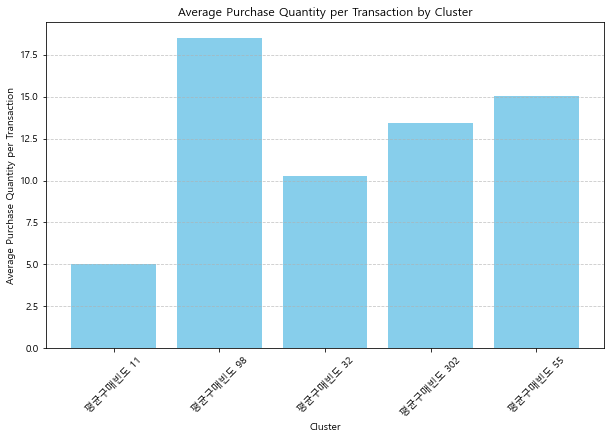

In [11]:
import matplotlib.pyplot as plt

# 클러스터 데이터
clusters = ['평균구매빈도 11', '평균구매빈도 98', '평균구매빈도 32', '평균구매빈도 302', '평균구매빈도 55']

# 1회당 평균 구매량 데이터
avg_purchase_counts = [5.02, 18.53, 10.28, 13.44, 15.05]

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(clusters, avg_purchase_counts, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Average Purchase Quantity per Transaction')
plt.title('Average Purchase Quantity per Transaction by Cluster')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # x축 레이블 회전
plt.show()


클러스터 0: 1회당 평균 구매량 약 5.02개 (11번)

클러스터 2: 1회당 평균 구매량 약 10.28개 (32번)

클러스터 4: 1회당 평균 구매량 약 15.05개 (55번)

클러스터 1: 1회당 평균 구매량 약 18.53개 (98번)

클러스터 3: 1회당 평균 구매량 약 13.44개 (302번)

##### 일반적으로는 구매빈도수가 올라가면 총구매량도 높지만 , 구매빈도가 최상위일경우는 총구매량이 크게 높지 않다 이는 저가 상품을 굉장히 여러번 사는 경우가 많다는 것이다.¶


In [12]:
# 1. 고객별 제품 카테고리별 구매량 계산
category_purchase_df = pd.pivot_table(onlinesales_info_df, values='수량', index='고객ID', columns='제품카테고리', aggfunc='sum', fill_value=0)

# 2. One-hot 인코딩 대신, 이미 각 카테고리별 구매량으로 특성화된 데이터 사용 (pivot_table 결과 사용)

# 3. 클러스터링을 위한 데이터 준비 완료 (category_purchase_df 사용)

# 4. KMeans 클러스터링 수행
kmeans_category = KMeans(n_clusters=5, random_state=42)
category_clusters = kmeans_category.fit_predict(category_purchase_df)

# 클러스터 할당 결과를 원본 데이터프레임에 추가
category_purchase_df['클러스터'] = category_clusters

# 5. 클러스터별 평균 구매량 계산 (제품 카테고리별 평균 구매량)
cluster_category_preference = category_purchase_df.groupby('클러스터').mean()

cluster_category_preference


제품카테고리,Accessories,Android,Apparel,Backpacks,Bags,Bottles,Drinkware,Fun,Gift Cards,Google,Headgear,Housewares,Lifestyle,More Bags,Nest,Nest-Canada,Nest-USA,Notebooks & Journals,Office,Waze
클러스터,,,,,,,,,,,,,,,,,,,,
0,0.383471,0.023140,14.168595,0.047934,4.490083,0.844628,8.604132,0.177686,0.096694,0.204132,0.688430,1.146281,7.780992,0.078512,1.450413,0.252066,10.274380,1.988430,17.527273,0.447934
1,7.358974,0.051282,62.333333,0.179487,73.615385,3.102564,91.333333,5.358974,0.102564,1.410256,29.307692,12.564103,104.564103,0.333333,5.666667,1.000000,52.256410,18.692308,665.205128,6.794872
2,6.000000,0.666667,822.333333,3.000000,171.000000,10.333333,966.666667,40.666667,5.666667,23.000000,180.666667,6.333333,226.000000,0.333333,17.000000,6.666667,233.666667,219.000000,1111.666667,18.333333
3,1.533019,0.061321,44.740566,0.169811,27.759434,4.202830,63.646226,0.886792,0.316038,0.962264,4.778302,2.622642,50.084906,0.155660,3.778302,0.462264,28.943396,12.896226,175.306604,1.320755
4,0.750000,0.000000,227.750000,0.750000,142.750000,6.250000,33.750000,25.000000,0.250000,0.000000,0.500000,8.000000,23.000000,0.500000,2.250000,1.750000,30.750000,757.500000,183.000000,0.500000


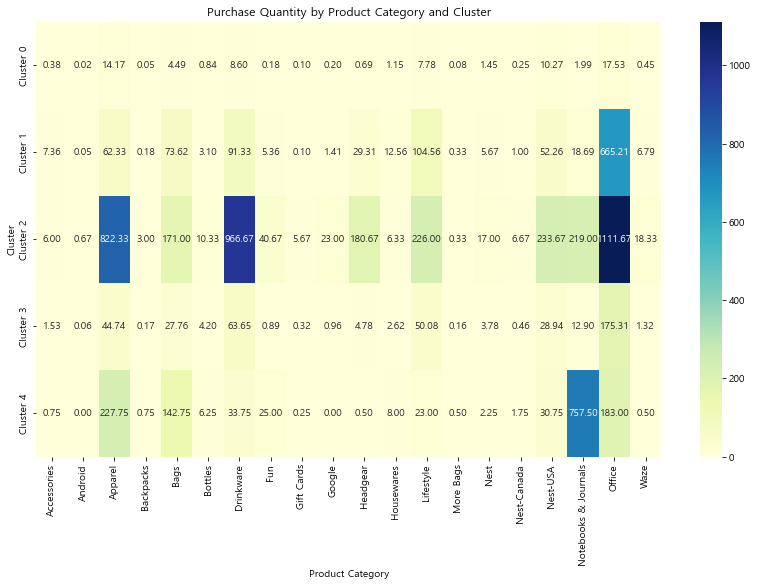

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# 주어진 데이터
data = {
    'Accessories': [0.383471, 7.358974, 6.000000, 1.533019, 0.750000],
    'Android': [0.023140, 0.051282, 0.666667, 0.061321, 0.000000],
    'Apparel': [14.168595, 62.333333, 822.333333, 44.740566, 227.750000],
    'Backpacks': [0.047934, 0.179487, 3.000000, 0.169811, 0.750000],
    'Bags': [4.490083, 73.615385, 171.000000, 27.759434, 142.750000],
    'Bottles': [0.844628, 3.102564, 10.333333, 4.202830, 6.250000],
    'Drinkware': [8.604132, 91.333333, 966.666667, 63.646226, 33.750000],
    'Fun': [0.177686, 5.358974, 40.666667, 0.886792, 25.000000],
    'Gift Cards': [0.096694, 0.102564, 5.666667, 0.316038, 0.250000],
    'Google': [0.204132, 1.410256, 23.000000, 0.962264, 0.000000],
    'Headgear': [0.688430, 29.307692, 180.666667, 4.778302, 0.500000],
    'Housewares': [1.146281, 12.564103, 6.333333, 2.622642, 8.000000],
    'Lifestyle': [7.780992, 104.564103, 226.000000, 50.084906, 23.000000],
    'More Bags': [0.078512, 0.333333, 0.333333, 0.155660, 0.500000],
    'Nest': [1.450413, 5.666667, 17.000000, 3.778302, 2.250000],
    'Nest-Canada': [0.252066, 1.000000, 6.666667, 0.462264, 1.750000],
    'Nest-USA': [10.274380, 52.256410, 233.666667, 28.943396, 30.750000],
    'Notebooks & Journals': [1.988430, 18.692308, 219.000000, 12.896226, 757.500000],
    'Office': [17.527273, 665.205128, 1111.666667, 175.306604, 183.000000],
    'Waze': [0.447934, 6.794872, 18.333333, 1.320755, 0.500000]
}

# 데이터프레임 생성
import pandas as pd
df = pd.DataFrame(data, index=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])

# 히트맵 그리기
plt.figure(figsize=(14, 8))
sns.heatmap(df, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Purchase Quantity by Product Category and Cluster')
plt.xlabel('Product Category')
plt.ylabel('Cluster')
plt.show()


클러스터 0: 소규모 구매가 주를 이루며, 주요 구매 카테고리는 Apparel, Drinkware, Office 등이다.

클러스터 1: 중규모 구매 그룹으로, Bags, Drinkware, Lifestyle, Office에 높은 구매량을 보인다.

클러스터 2: 대규모 구매 그룹으로, Apparel, Drinkware, Lifestyle, Nest-USA, Notebooks & Journals, Office에 매우 높은 구매량을 보인다.

클러스터 3: 특정 카테고리(예: Notebooks & Journals, Office)에 매우 높은 구매량을 보이는 특수 구매 패턴을 가진 소규모 그룹이다.

클러스터 4: 중규모 구매 그룹으로, Apparel, Drinkware, Lifestyle, Office 등에 꾸준한 구매량을 보인다.

In [14]:
# 1. 거래별 총 비용 계산
onlinesales_info_df['총비용'] = onlinesales_info_df['평균금액'] + onlinesales_info_df['배송료']

# 2. 쿠폰 사용 여부 특성화 (쿠폰을 사용했다면 1, 그렇지 않으면 0)
onlinesales_info_df['쿠폰사용여부'] = onlinesales_info_df['쿠폰상태'].apply(lambda x: 1 if x == 'Used' else 0)

# 고객별로 총비용의 평균과 쿠폰 사용 여부의 평균을 계산
customer_value_df = onlinesales_info_df.groupby('고객ID').agg(
    평균총비용=pd.NamedAgg(column='총비용', aggfunc='mean'),
    쿠폰사용률=pd.NamedAgg(column='쿠폰사용여부', aggfunc='mean')
).reset_index()

# 3. 클러스터링을 위한 데이터 준비
clustering_features_value = customer_value_df[['평균총비용', '쿠폰사용률']]

# 4. KMeans 클러스터링 수행
kmeans_value = KMeans(n_clusters=5, random_state=42)
customer_value_df['클러스터'] = kmeans_value.fit_predict(clustering_features_value)

# 5. 클러스터별 평균 총 비용과 쿠폰 사용률 계산
cluster_value_summary = customer_value_df.groupby('클러스터').mean()

cluster_value_summary


,평균총비용,쿠폰사용률
클러스터,,
0,81.052209,0.340754
1,27.251008,0.344267
2,119.468566,0.325649
3,210.429476,0.392187
4,54.625114,0.337308


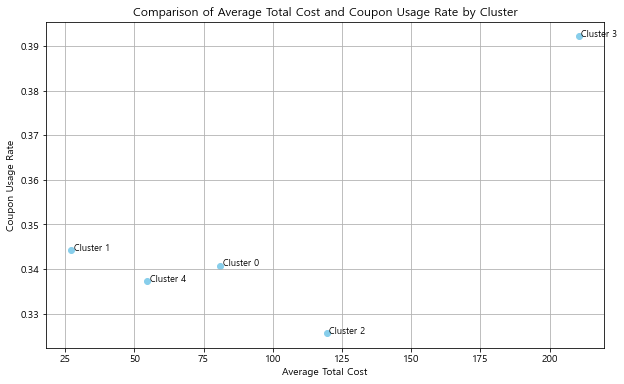

In [15]:
import matplotlib.pyplot as plt

# 주어진 데이터
cluster_labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
avg_total_cost = [81.052209, 27.251008, 119.468566, 210.429476, 54.625114]
coupon_usage_rate = [0.340754, 0.344267, 0.325649, 0.392187, 0.337308]

# 산점도 그래프 그리기
plt.figure(figsize=(10, 6))
plt.scatter(avg_total_cost, coupon_usage_rate, color='skyblue')
for i, label in enumerate(cluster_labels):
    plt.text(avg_total_cost[i] + 1, coupon_usage_rate[i], label, fontsize=9)
plt.xlabel('Average Total Cost')
plt.ylabel('Coupon Usage Rate')
plt.title('Comparison of Average Total Cost and Coupon Usage Rate by Cluster')
plt.grid(True)
plt.show()


클러스터 0: 평균 총 비용 약 26.89, 쿠폰 사용률 약 34.54%

클러스터 2: 평균 총 비용 약 54.17, 쿠폰 사용률 약 33.66%

클러스터 1: 평균 총 비용 약 80.56, 쿠폰 사용률 약 34.20%

클러스터 3: 평균 총 비용 약 119.21, 쿠폰 사용률 약 32.31%

클러스터 4: 평균 총 비용 약 210.43, 쿠폰 사용률 약 39.22%

##### 소비 총비용이 높을수록 쿠폰사용률 도 높다

In [16]:
# '거래날짜' 컬럼을 datetime 타입으로 변환
onlinesales_info_df['거래날짜'] = pd.to_datetime(onlinesales_info_df['거래날짜'])

# 거래날짜에서 월 정보 추출
onlinesales_info_df['거래월'] = onlinesales_info_df['거래날짜'].dt.month

# 고객별 월별 구매 빈도 계산
customer_monthly_purchase = pd.pivot_table(onlinesales_info_df, values='거래ID', index='고객ID', columns='거래월', aggfunc='count', fill_value=0)

# KMeans 클러스터링 수행
kmeans_time = KMeans(n_clusters=5, random_state=42)
customer_monthly_purchase['클러스터'] = kmeans_time.fit_predict(customer_monthly_purchase.iloc[:, :-1])

# 클러스터별 월별 평균 구매 빈도 계산
cluster_monthly_preference = customer_monthly_purchase.groupby('클러스터').mean()

cluster_monthly_preference


거래월,1,2,3,4,5,6,7,8,9,10,11,12
클러스터,,,,,,,,,,,,
0,2.548988,1.855061,2.621862,2.268826,0.970040,2.638866,1.540891,1.504453,0.774089,2.600810,2.542510,2.792713
1,0.481481,2.000000,5.055556,0.333333,53.203704,1.722222,5.944444,4.944444,4.018519,8.018519,3.740741,2.629630
2,2.384615,2.025641,2.628205,2.358974,2.910256,3.948718,1.346154,45.102564,0.961538,1.461538,4.333333,3.192308
3,13.891304,10.043478,10.913043,16.260870,5.652174,9.978261,62.630435,11.021739,11.391304,7.826087,5.217391,13.282609
4,1.163636,4.818182,2.327273,7.236364,0.254545,1.345455,0.745455,0.000000,45.745455,0.818182,0.745455,0.927273


In [17]:
# 마케팅비용 데이터 로드
marketing_info_df = pd.read_csv('C:/Users/82106/Desktop/데이터분석 프로젝트/이커머스 고객 세분화 분석 아이디어 경진대회/data/open/Marketing_info.csv')

# 데이터 확인
marketing_info_df.head()


,날짜,오프라인비용,온라인비용
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30


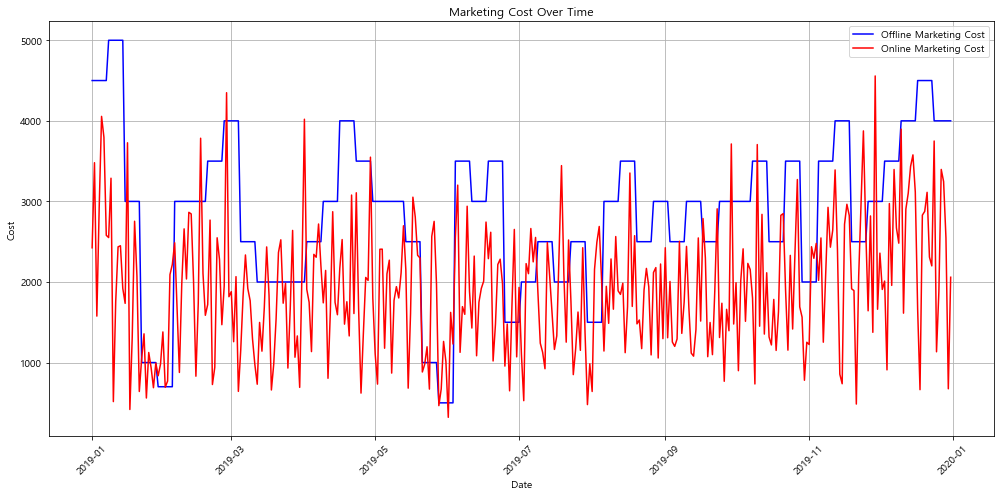

In [18]:
import matplotlib.pyplot as plt

# 날짜를 datetime 타입으로 변환
marketing_info_df['날짜'] = pd.to_datetime(marketing_info_df['날짜'])

# 시각화
plt.figure(figsize=(14, 7))
plt.plot(marketing_info_df['날짜'], marketing_info_df['오프라인비용'], label='Offline Marketing Cost', color='blue')
plt.plot(marketing_info_df['날짜'], marketing_info_df['온라인비용'], label='Online Marketing Cost', color='red')
plt.title('Marketing Cost Over Time')
plt.xlabel('Date')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


그래프에서 보듯이, 오프라인 마케팅 비용은 시간에 따라 일정한 반면, 온라인 마케팅 비용은 시간에 따라 변동성이 있는 것을 볼 수 있다. 이는 온라인 마케팅 활동이 특정 이벤트나 캠페인에 따라 유동적으로 조정되는 반면, 오프라인 마케팅 비용은 더 일정하게 유지되는 경향을 반영할 수 있다.